### PREDICTING  REMAINING USEFULL LIFE OF JET ENGINES

In [1]:
 # import dependancies
import pandas as pd 
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [ ]:
 # setting up columns  
column_names = ['engine_id', 'cycle'] + \
               [f'operational_setting_{i}' for i in range(1, 4)] + \
               [f'sensor_measurement_{i}' for i in range(1, 22)]

rul_col_names = ['RUL']

 # Loading the train data
train_df_FD001 = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=column_names)
train_df_FD002 = pd.read_csv('train_FD002.txt', sep='\s+', header=None, names=column_names)
train_df_FD003 = pd.read_csv('train_FD003.txt', sep='\s+', header=None, names=column_names)
train_df_FD004 = pd.read_csv('train_FD004.txt', sep='\s+', header=None, names=column_names)

 # Loading the test data
test_df_FD001 = pd.read_csv('test_FD001.txt', sep='\s+', header=None, names=column_names)
test_df_FD002 = pd.read_csv('test_FD002.txt', sep='\s+', header=None, names=column_names)
test_df_FD003 = pd.read_csv('test_FD003.txt', sep='\s+', header=None, names=column_names)
test_df_FD004 = pd.read_csv('test_FD004.txt', sep='\s+', header=None, names=column_names)

 # Loading the RUL
RUL_df_FD001 = pd.read_csv('RUL_FD001.txt', sep='\s+', header=None, names=rul_col_names)
RUL_df_FD002 = pd.read_csv('RUL_FD002.txt', sep='\s+', header=None, names=rul_col_names)
RUL_df_FD003 = pd.read_csv('RUL_FD003.txt', sep='\s+', header=None, names=rul_col_names)
RUL_df_FD004 = pd.read_csv('RUL_FD004.txt', sep='\s+', header=None, names=rul_col_names)


In [3]:
 # Setting up the visualization style 
sns.set_style( style = 'darkgrid' )
sns.set_palette( palette = 'icefire' )

In [4]:
 # Dataframes
test_dfs = { 
       'test_FD001':test_df_FD001, 
       'test_FD002':test_df_FD002, 
       'test_FD003':test_df_FD003, 
       'test_FD004':test_df_FD004
       }

train_dfs = {
       'train_FD001':train_df_FD001, 
       'train_FD002':train_df_FD002, 
       'train_FD003':train_df_FD003, 
       'train_FD004':train_df_FD004
}

RUL_dfs = {
    'RUL_FD001': RUL_df_FD001,
    'RUL_FD002': RUL_df_FD002,
    'RUL_FD003': RUL_df_FD003,
    'RUL_FD004': RUL_df_FD004
}

for name, df in train_dfs.items():
    print(f"\n{'='*40}\n{name} - info\n{'='*40}")

    buffer = StringIO()
    df.info(buf=buffer)
    info_str = buffer.getvalue()
    print(info_str)

    print(f"\n{name} - .Statistical Description()\n{'-'*40}")
    display( df.describe(include='all').T)


train_FD001 - info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              20631 non-null  int64  
 1   cycle                  20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_measurement_1   20631 non-null  float64
 6   sensor_measurement_2   20631 non-null  float64
 7   sensor_measurement_3   20631 non-null  float64
 8   sensor_measurement_4   20631 non-null  float64
 9   sensor_measurement_5   20631 non-null  float64
 10  sensor_measurement_6   20631 non-null  float64
 11  sensor_measurement_7   20631 non-null  float64
 12  sensor_measurement_8   20631 non-null  float64
 13  sensor_measurement_9   20631 non-null  float64
 14  sensor_measurement_10  20631 non-n

count         mean           std        min  \
engine_id              20631.0    51.506568  2.922763e+01     1.0000   
cycle                  20631.0   108.807862  6.888099e+01     1.0000   
operational_setting_1  20631.0    -0.000009  2.187313e-03    -0.0087   
operational_setting_2  20631.0     0.000002  2.930621e-04    -0.0006   
operational_setting_3  20631.0   100.000000  0.000000e+00   100.0000   
sensor_measurement_1   20631.0   518.670000  0.000000e+00   518.6700   
sensor_measurement_2   20631.0   642.680934  5.000533e-01   641.2100   
sensor_measurement_3   20631.0  1590.523119  6.131150e+00  1571.0400   
sensor_measurement_4   20631.0  1408.933782  9.000605e+00  1382.2500   
sensor_measurement_5   20631.0    14.620000  1.776400e-15    14.6200   
sensor_measurement_6   20631.0    21.609803  1.388985e-03    21.6000   
sensor_measurement_7   20631.0   553.367711  8.850923e-01   549.8500   
sensor_measurement_8   20631.0  2388.096652  7.098548e-02  2387.9000   
sensor_measurement_9   20631.0  9065.242941  2.208288e+01  9021.7300   
sensor_measurement_10  20631.0     1.300000  0.000000e+00     1.3000   
sensor_measurement_11  20631.0    47.541168  2.670874e-01    46.8500   
sensor_measurement_12  20631.0   521.413470  7.375534e-01   518.6900   
sensor_measurement_13  20631.0  2388.096152  7.191892e-02  2387.8800   
sensor_measurement_14  20631.0  8143.752722  1.907618e+01  8099.9400   
sensor_measurement_15  20631.0     8.442146  3.750504e-02     8.3249   
sensor_measurement_16  20631.0     0.030000  1.387812e-17     0.0300   
sensor_measurement_17  20631.0   393.210654  1.548763e+00   388.0000   
sensor_measurement_18  20631.0  2388.000000  0.000000e+00  2388.0000   
sensor_measurement_19  20631.0   100.000000  0.000000e+00   100.0000   
sensor_measurement_20  20631.0    38.816271  1.807464e-01    38.1400   
sensor_measurement_21  20631.0    23.289705  1.082509e-01    22.8942   

                             25%        50%        75%        max  
engine_id                26.0000    52.0000    77.0000   100.0000  
cycle                    52.0000   104.0000   156.0000   362.0000  
operational_setting_1    -0.0015     0.0000     0.0015     0.0087  
operational_setting_2    -0.0002     0.0000     0.0003     0.0006  
operational_setting_3   100.0000   100.0000   100.0000   100.0000  
sensor_measurement_1    518.6700   518.6700   518.6700   518.6700  
sensor_measurement_2    642.3250   642.6400   643.0000   644.5300  
sensor_measurement_3   1586.2600  1590.1000  1594.3800  1616.9100  
sensor_measurement_4   1402.3600  1408.0400  1414.5550  1441.4900  
sensor_measurement_5     14.6200    14.6200    14.6200    14.6200  
sensor_measurement_6     21.6100    21.6100    21.6100    21.6100  
sensor_measurement_7    552.8100   553.4400   554.0100   556.0600  
sensor_measurement_8   2388.0500  2388.0900  2388.1400  2388.5600  
sensor_measurement_9   9053.1000  9060.6600  9069.4200  9244.5900  
sensor_measurement_10     1.3000     1.3000     1.3000     1.3000  
sensor_measurement_11    47.3500    47.5100    47.7000    48.5300  
sensor_measurement_12   520.9600   521.4800   521.9500   523.3800  
sensor_measurement_13  2388.0400  2388.0900  2388.1400  2388.5600  
sensor_measurement_14  8133.2450  8140.5400  8148.3100  8293.7200  
sensor_measurement_15     8.4149     8.4389     8.4656     8.5848  
sensor_measurement_16     0.0300     0.0300     0.0300     0.0300  
sensor_measurement_17   392.0000   393.0000   394.0000   400.0000  
sensor_measurement_18  2388.0000  2388.0000  2388.0000  2388.0000  
sensor_measurement_19   100.0000   100.0000   100.0000   100.0000  
sensor_measurement_20    38.7000    38.8300    38.9500    39.4300  
sensor_measurement_21    23.2218    23.2979    23.3668    23.6184


train_FD002 - info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              53759 non-null  int64  
 1   cycle                  53759 non-null  int64  
 2   operational_setting_1  53759 non-null  float64
 3   operational_setting_2  53759 non-null  float64
 4   operational_setting_3  53759 non-null  float64
 5   sensor_measurement_1   53759 non-null  float64
 6   sensor_measurement_2   53759 non-null  float64
 7   sensor_measurement_3   53759 non-null  float64
 8   sensor_measurement_4   53759 non-null  float64
 9   sensor_measurement_5   53759 non-null  float64
 10  sensor_measurement_6   53759 non-null  float64
 11  sensor_measurement_7   53759 non-null  float64
 12  sensor_measurement_8   53759 non-null  float64
 13  sensor_measurement_9   53759 non-null  float64
 14  sensor_measurement_10  53759 non-n

count         mean         std        min        25%  \
engine_id              53759.0   131.082981   74.463862     1.0000    68.0000   
cycle                  53759.0   109.154746   69.180569     1.0000    52.0000   
operational_setting_1  53759.0    23.998407   14.747376     0.0000    10.0046   
operational_setting_2  53759.0     0.572056    0.310016     0.0000     0.2507   
operational_setting_3  53759.0    94.046020   14.237735    60.0000   100.0000   
sensor_measurement_1   53759.0   472.910207   26.389707   445.0000   445.0000   
sensor_measurement_2   53759.0   579.672399   37.289399   535.5300   549.5700   
sensor_measurement_3   53759.0  1419.971013  105.946341  1243.7300  1352.7600   
sensor_measurement_4   53759.0  1205.442024  119.123428  1023.7700  1123.6550   
sensor_measurement_5   53759.0     8.031986    3.613839     3.9100     3.9100   
sensor_measurement_6   53759.0    11.600746    5.431802     5.7100     5.7200   
sensor_measurement_7   53759.0   282.606787  146.005306   136.8000   139.9350   
sensor_measurement_8   53759.0  2228.879188  145.209816  1914.7700  2211.8800   
sensor_measurement_9   53759.0  8525.200837  335.812013  7985.5600  8321.6600   
sensor_measurement_10  53759.0     1.094962    0.127469     0.9300     1.0200   
sensor_measurement_11  53759.0    42.985172    3.232372    36.2300    41.9100   
sensor_measurement_12  53759.0   266.069034  137.659507   129.1200   131.5200   
sensor_measurement_13  53759.0  2334.557253  128.068271  2027.6100  2387.9000   
sensor_measurement_14  53759.0  8066.597682   84.837950  7848.3600  8062.1400   
sensor_measurement_15  53759.0     9.329654    0.749335     8.3357     8.6778   
sensor_measurement_16  53759.0     0.023326    0.004711     0.0200     0.0200   
sensor_measurement_17  53759.0   348.309511   27.754515   303.0000   331.0000   
sensor_measurement_18  53759.0  2228.806358  145.327980  1915.0000  2212.0000   
sensor_measurement_19  53759.0    97.756838    5.364067    84.9300   100.0000   
sensor_measurement_20  53759.0    20.789296    9.869331    10.1800    10.9100   
sensor_measurement_21  53759.0    12.473423    5.921615     6.0105     6.5463   

                             50%        75%        max  
engine_id               131.0000   195.0000   260.0000  
cycle                   104.0000   157.0000   378.0000  
operational_setting_1    25.0013    41.9980    42.0080  
operational_setting_2     0.7000     0.8400     0.8420  
operational_setting_3   100.0000   100.0000   100.0000  
sensor_measurement_1    462.5400   491.1900   518.6700  
sensor_measurement_2    555.9800   607.3400   644.5200  
sensor_measurement_3   1369.1800  1499.3700  1612.8800  
sensor_measurement_4   1138.8900  1306.8500  1439.2300  
sensor_measurement_5      7.0500    10.5200    14.6200  
sensor_measurement_6      9.0300    15.4900    21.6100  
sensor_measurement_7    194.6600   394.0800   555.8200  
sensor_measurement_8   2223.0700  2323.9600  2388.3900  
sensor_measurement_9   8361.2000  8778.0300  9215.6600  
sensor_measurement_10     1.0200     1.2600     1.3000  
sensor_measurement_11    42.3900    45.3500    48.5100  
sensor_measurement_12   183.2000   371.2600   523.3700  
sensor_measurement_13  2388.0800  2388.1700  2390.4800  
sensor_measurement_14  8082.5400  8127.1950  8268.5000  
sensor_measurement_15     9.3109     9.3869    11.0669  
sensor_measurement_16     0.0200     0.0300     0.0300  
sensor_measurement_17   335.0000   369.0000   399.0000  
sensor_measurement_18  2223.0000  2324.0000  2388.0000  
sensor_measurement_19   100.0000   100.0000   100.0000  
sensor_measurement_20    14.8800    28.4700    39.3400  
sensor_measurement_21     8.9292    17.0832    23.5901


train_FD003 - info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              24720 non-null  int64  
 1   cycle                  24720 non-null  int64  
 2   operational_setting_1  24720 non-null  float64
 3   operational_setting_2  24720 non-null  float64
 4   operational_setting_3  24720 non-null  float64
 5   sensor_measurement_1   24720 non-null  float64
 6   sensor_measurement_2   24720 non-null  float64
 7   sensor_measurement_3   24720 non-null  float64
 8   sensor_measurement_4   24720 non-null  float64
 9   sensor_measurement_5   24720 non-null  float64
 10  sensor_measurement_6   24720 non-null  float64
 11  sensor_measurement_7   24720 non-null  float64
 12  sensor_measurement_8   24720 non-null  float64
 13  sensor_measurement_9   24720 non-null  float64
 14  sensor_measurement_10  24720 non-n

count         mean           std        min  \
engine_id              24720.0    48.631877  2.934899e+01     1.0000   
cycle                  24720.0   139.077063  9.884668e+01     1.0000   
operational_setting_1  24720.0    -0.000024  2.193545e-03    -0.0086   
operational_setting_2  24720.0     0.000005  2.940429e-04    -0.0006   
operational_setting_3  24720.0   100.000000  0.000000e+00   100.0000   
sensor_measurement_1   24720.0   518.670000  0.000000e+00   518.6700   
sensor_measurement_2   24720.0   642.457858  5.230311e-01   640.8400   
sensor_measurement_3   24720.0  1588.079175  6.810418e+00  1564.3000   
sensor_measurement_4   24720.0  1404.471212  9.773178e+00  1377.0600   
sensor_measurement_5   24720.0    14.620000  3.552786e-15    14.6200   
sensor_measurement_6   24720.0    21.595841  1.811600e-02    21.4500   
sensor_measurement_7   24720.0   555.143808  3.437343e+00   549.6100   
sensor_measurement_8   24720.0  2388.071555  1.582849e-01  2386.9000   
sensor_measurement_9   24720.0  9064.110809  1.998029e+01  9017.9800   
sensor_measurement_10  24720.0     1.301232  3.484849e-03     1.2900   
sensor_measurement_11  24720.0    47.415707  3.000742e-01    46.6900   
sensor_measurement_12  24720.0   523.050873  3.255314e+00   517.7700   
sensor_measurement_13  24720.0  2388.071643  1.581207e-01  2386.9300   
sensor_measurement_14  24720.0  8144.202916  1.650412e+01  8099.6800   
sensor_measurement_15  24720.0     8.396176  6.051161e-02     8.1563   
sensor_measurement_16  24720.0     0.030000  1.734759e-17     0.0300   
sensor_measurement_17  24720.0   392.566545  1.761459e+00   388.0000   
sensor_measurement_18  24720.0  2388.000000  0.000000e+00  2388.0000   
sensor_measurement_19  24720.0   100.000000  0.000000e+00   100.0000   
sensor_measurement_20  24720.0    38.988552  2.488647e-01    38.1700   
sensor_measurement_21  24720.0    23.393024  1.492338e-01    22.8726   

                             25%        50%        75%        max  
engine_id                23.0000    47.0000    74.0000   100.0000  
cycle                    62.0000   124.0000   191.0000   525.0000  
operational_setting_1    -0.0015    -0.0000     0.0015     0.0086  
operational_setting_2    -0.0002    -0.0000     0.0003     0.0007  
operational_setting_3   100.0000   100.0000   100.0000   100.0000  
sensor_measurement_1    518.6700   518.6700   518.6700   518.6700  
sensor_measurement_2    642.0800   642.4000   642.7900   645.1100  
sensor_measurement_3   1583.2800  1587.5200  1592.4125  1615.3900  
sensor_measurement_4   1397.1875  1402.9100  1410.6000  1441.1600  
sensor_measurement_5     14.6200    14.6200    14.6200    14.6200  
sensor_measurement_6     21.5800    21.6000    21.6100    21.6100  
sensor_measurement_7    553.1100   554.0500   556.0400   570.4900  
sensor_measurement_8   2388.0000  2388.0700  2388.1400  2388.6000  
sensor_measurement_9   9051.9200  9060.0100  9070.0925  9234.3500  
sensor_measurement_10     1.3000     1.3000     1.3000     1.3200  
sensor_measurement_11    47.1900    47.3600    47.6000    48.4400  
sensor_measurement_12   521.1500   521.9800   523.8400   537.4000  
sensor_measurement_13  2388.0100  2388.0700  2388.1400  2388.6100  
sensor_measurement_14  8134.5100  8141.2000  8149.2300  8290.5500  
sensor_measurement_15     8.3606     8.3983     8.4370     8.5705  
sensor_measurement_16     0.0300     0.0300     0.0300     0.0300  
sensor_measurement_17   391.0000   392.0000   394.0000   399.0000  
sensor_measurement_18  2388.0000  2388.0000  2388.0000  2388.0000  
sensor_measurement_19   100.0000   100.0000   100.0000   100.0000  
sensor_measurement_20    38.8300    38.9900    39.1400    39.8500  
sensor_measurement_21    23.2962    23.3916    23.4833    23.9505


train_FD004 - info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61249 entries, 0 to 61248
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   engine_id              61249 non-null  int64  
 1   cycle                  61249 non-null  int64  
 2   operational_setting_1  61249 non-null  float64
 3   operational_setting_2  61249 non-null  float64
 4   operational_setting_3  61249 non-null  float64
 5   sensor_measurement_1   61249 non-null  float64
 6   sensor_measurement_2   61249 non-null  float64
 7   sensor_measurement_3   61249 non-null  float64
 8   sensor_measurement_4   61249 non-null  float64
 9   sensor_measurement_5   61249 non-null  float64
 10  sensor_measurement_6   61249 non-null  float64
 11  sensor_measurement_7   61249 non-null  float64
 12  sensor_measurement_8   61249 non-null  float64
 13  sensor_measurement_9   61249 non-null  float64
 14  sensor_measurement_10  61249 non-n

count         mean         std        min        25%  \
engine_id              61249.0   124.325181   71.995350     1.0000    60.0000   
cycle                  61249.0   134.311417   89.783389     1.0000    62.0000   
operational_setting_1  61249.0    23.999823   14.780722     0.0000    10.0046   
operational_setting_2  61249.0     0.571347    0.310703     0.0000     0.2507   
operational_setting_3  61249.0    94.031576   14.251954    60.0000   100.0000   
sensor_measurement_1   61249.0   472.882435   26.436832   445.0000   445.0000   
sensor_measurement_2   61249.0   579.420056   37.342647   535.4800   549.3300   
sensor_measurement_3   61249.0  1417.896600  106.167598  1242.6700  1350.5500   
sensor_measurement_4   61249.0  1201.915359  119.327591  1024.4200  1119.4900   
sensor_measurement_5   61249.0     8.031626    3.622872     3.9100     3.9100   
sensor_measurement_6   61249.0    11.589457    5.444017     5.6700     5.7200   
sensor_measurement_7   61249.0   283.328633  146.880210   136.1700   142.9200   
sensor_measurement_8   61249.0  2228.686034  145.348243  1914.7200  2211.9500   
sensor_measurement_9   61249.0  8524.673301  336.927547  7984.5100  8320.5900   
sensor_measurement_10  61249.0     1.096445    0.127681     0.9300     1.0200   
sensor_measurement_11  61249.0    42.874529    3.243492    36.0400    41.7600   
sensor_measurement_12  61249.0   266.735665  138.479109   128.3100   134.5200   
sensor_measurement_13  61249.0  2334.427590  128.197859  2027.5700  2387.9100   
sensor_measurement_14  61249.0  8067.811812   85.670543  7845.7800  8062.6300   
sensor_measurement_15  61249.0     9.285604    0.750374     8.1757     8.6480   
sensor_measurement_16  61249.0     0.023252    0.004685     0.0200     0.0200   
sensor_measurement_17  61249.0   347.760029   27.808283   302.0000   330.0000   
sensor_measurement_18  61249.0  2228.613283  145.472491  1915.0000  2212.0000   
sensor_measurement_19  61249.0    97.751396    5.369424    84.9300   100.0000   
sensor_measurement_20  61249.0    20.864333    9.936396    10.1600    10.9400   
sensor_measurement_21  61249.0    12.518995    5.962697     6.0843     6.5661   

                             50%        75%        max  
engine_id               126.0000   185.0000   249.0000  
cycle                   123.0000   191.0000   543.0000  
operational_setting_1    25.0014    41.9981    42.0080  
operational_setting_2     0.7000     0.8400     0.8420  
operational_setting_3   100.0000   100.0000   100.0000  
sensor_measurement_1    462.5400   491.1900   518.6700  
sensor_measurement_2    555.7400   607.0700   644.4200  
sensor_measurement_3   1367.6800  1497.4200  1613.0000  
sensor_measurement_4   1136.9200  1302.6200  1440.7700  
sensor_measurement_5      7.0500    10.5200    14.6200  
sensor_measurement_6      9.0300    15.4800    21.6100  
sensor_measurement_7    194.9600   394.2800   570.8100  
sensor_measurement_8   2223.0700  2323.9300  2388.6400  
sensor_measurement_9   8362.7600  8777.2500  9196.8100  
sensor_measurement_10     1.0300     1.2600     1.3200  
sensor_measurement_11    42.3300    45.2200    48.3600  
sensor_measurement_12   183.4500   371.4000   537.4900  
sensor_measurement_13  2388.0600  2388.1700  2390.4900  
sensor_measurement_14  8083.8100  8128.3500  8261.6500  
sensor_measurement_15     9.2556     9.3658    11.0663  
sensor_measurement_16     0.0200     0.0300     0.0300  
sensor_measurement_17   334.0000   368.0000   399.0000  
sensor_measurement_18  2223.0000  2324.0000  2388.0000  
sensor_measurement_19   100.0000   100.0000   100.0000  
sensor_measurement_20    14.9300    28.5600    39.8900  
sensor_measurement_21     8.9601    17.1355    23.8852

All the DataFrames contain purely numerical data, each consisting of a total of 26 columns. This consistency across the datasets provides a uniform structure, which is beneficial for subsequent analysis.

In [5]:
 # Getting Null values
for name , df in train_dfs.items():
    print( f"\n{'='*40}\n{name} - null Values\n{'='*40}" )
    display( df.isnull().sum())

    print( f"\n{'='*40}\n{name} - duplicate Values\n{'='*40}" )
    display(df.duplicated().sum())


train_FD001 - null Values


engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


train_FD001 - duplicate Values


np.int64(0)


train_FD002 - null Values


engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


train_FD002 - duplicate Values


np.int64(0)


train_FD003 - null Values


engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


train_FD003 - duplicate Values


np.int64(0)


train_FD004 - null Values


engine_id                0
cycle                    0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64


train_FD004 - duplicate Values


np.int64(0)

The datasets contains no duplicate records or missing (null) values. This indicates that the data is clean with respect to redundancy and completeness, reducing the need for extensive preprocessing in these areas

In [6]:
 # Getting the number of unique values 
for name , df in train_dfs.items():
    print( f"\n{'='*40}\n{name} - Unique Values\n{'='*40}" )
    display( df.nunique() )


train_FD001 - Unique Values


engine_id                 100
cycle                     362
operational_setting_1     158
operational_setting_2      13
operational_setting_3       1
sensor_measurement_1        1
sensor_measurement_2      310
sensor_measurement_3     3012
sensor_measurement_4     4051
sensor_measurement_5        1
sensor_measurement_6        2
sensor_measurement_7      513
sensor_measurement_8       53
sensor_measurement_9     6403
sensor_measurement_10       1
sensor_measurement_11     159
sensor_measurement_12     427
sensor_measurement_13      56
sensor_measurement_14    6078
sensor_measurement_15    1918
sensor_measurement_16       1
sensor_measurement_17      13
sensor_measurement_18       1
sensor_measurement_19       1
sensor_measurement_20     120
sensor_measurement_21    4745
dtype: int64


train_FD002 - Unique Values


engine_id                  260
cycle                      378
operational_setting_1      536
operational_setting_2      105
operational_setting_3        2
sensor_measurement_1         6
sensor_measurement_2      1590
sensor_measurement_3     12305
sensor_measurement_4     15411
sensor_measurement_5         6
sensor_measurement_6        14
sensor_measurement_7      2067
sensor_measurement_8       897
sensor_measurement_9     22434
sensor_measurement_10        9
sensor_measurement_11      681
sensor_measurement_12     1672
sensor_measurement_13      514
sensor_measurement_14    14905
sensor_measurement_15     8464
sensor_measurement_16        2
sensor_measurement_17       53
sensor_measurement_18        6
sensor_measurement_19        2
sensor_measurement_20      510
sensor_measurement_21    17837
dtype: int64


train_FD003 - Unique Values


engine_id                 100
cycle                     525
operational_setting_1     160
operational_setting_2      14
operational_setting_3       1
sensor_measurement_1        1
sensor_measurement_2      334
sensor_measurement_3     3358
sensor_measurement_4     4383
sensor_measurement_5        1
sensor_measurement_6       17
sensor_measurement_7     1854
sensor_measurement_8      161
sensor_measurement_9     7114
sensor_measurement_10       4
sensor_measurement_11     170
sensor_measurement_12    1772
sensor_measurement_13     163
sensor_measurement_14    6320
sensor_measurement_15    3122
sensor_measurement_16       1
sensor_measurement_17      12
sensor_measurement_18       1
sensor_measurement_19       1
sensor_measurement_20     165
sensor_measurement_21    6440
dtype: int64


train_FD004 - Unique Values


engine_id                  249
cycle                      543
operational_setting_1      536
operational_setting_2      105
operational_setting_3        2
sensor_measurement_1         6
sensor_measurement_2      1704
sensor_measurement_3     13558
sensor_measurement_4     17353
sensor_measurement_5         6
sensor_measurement_6        46
sensor_measurement_7      5926
sensor_measurement_8      1038
sensor_measurement_9     25297
sensor_measurement_10       21
sensor_measurement_11      737
sensor_measurement_12     5627
sensor_measurement_13      483
sensor_measurement_14    15938
sensor_measurement_15    11915
sensor_measurement_16        2
sensor_measurement_17       54
sensor_measurement_18        6
sensor_measurement_19        2
sensor_measurement_20      652
sensor_measurement_21    21574
dtype: int64

The output reveals that certain columns—specifically Operational_setting_3, and Sensor_measurement_1, 5, 6, 10, 16, 18, and 19—have only a few unique values. This limited variability may indicate that these features contribute minimal informational value to the model and could be considered for exclusion or further analysis during feature selection.

In [7]:
 # Getting the Statistical description for the RUL
for name, df in RUL_dfs.items():
    print(f"\n{'='*40}\n{name} - info\n{'='*40}")

    buffer = StringIO()
    df.info(buf=buffer)
    info_str = buffer.getvalue()
    print(info_str)

    print(f"\n{name} - .Statistical Description()\n{'-'*40}")
    display( df.describe(include='all'))


RUL_FD001 - info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RUL     100 non-null    int64
dtypes: int64(1)
memory usage: 932.0 bytes


RUL_FD001 - .Statistical Description()
----------------------------------------


RUL
count  100.00000
mean    75.52000
std     41.76497
min      7.00000
25%     32.75000
50%     86.00000
75%    112.25000
max    145.00000


RUL_FD002 - info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RUL     259 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


RUL_FD002 - .Statistical Description()
----------------------------------------


RUL
count  259.000000
mean    81.185328
std     53.882916
min      6.000000
25%     35.000000
50%     80.000000
75%    121.000000
max    194.000000


RUL_FD003 - info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RUL     100 non-null    int64
dtypes: int64(1)
memory usage: 932.0 bytes


RUL_FD003 - .Statistical Description()
----------------------------------------


RUL
count  100.000000
mean    75.320000
std     41.604166
min      6.000000
25%     43.250000
50%     77.500000
75%    115.000000
max    145.000000


RUL_FD004 - info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RUL     248 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


RUL_FD004 - .Statistical Description()
----------------------------------------


RUL
count  248.000000
mean    86.552419
std     54.634054
min      6.000000
25%     36.000000
50%     88.000000
75%    126.750000
max    195.000000

The RUL DataFrames for FD001 and FD003 each contain data for 100 engines, with mean RUL values of 75.52 and 75.32, respectively. In contrast, the RUL DataFrames for FD002 and FD004 contain 259 and 248 engines, with higher mean RUL values of 81.18 and 86.55, respectively. None of the datasets contain null values, indicating completeness in the recorded Remaining Useful Life data.

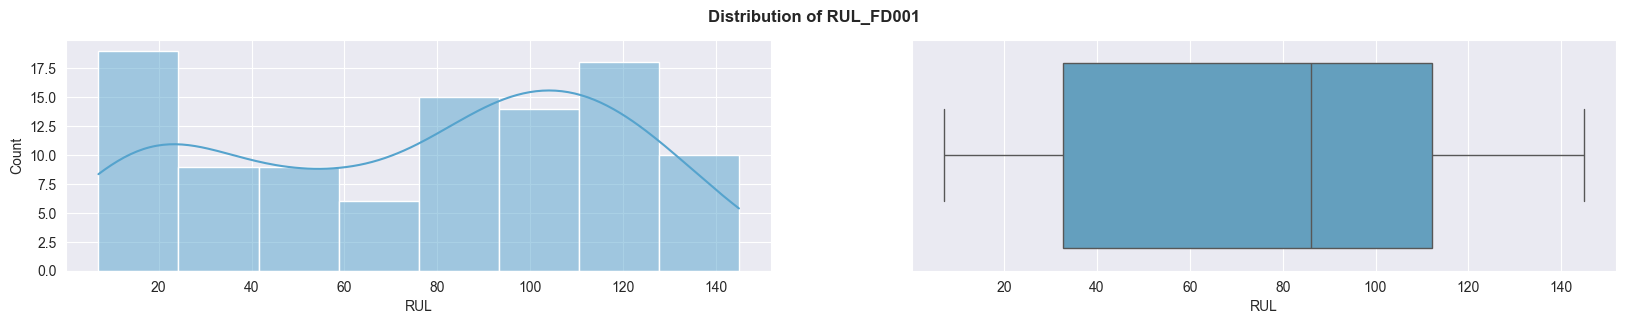

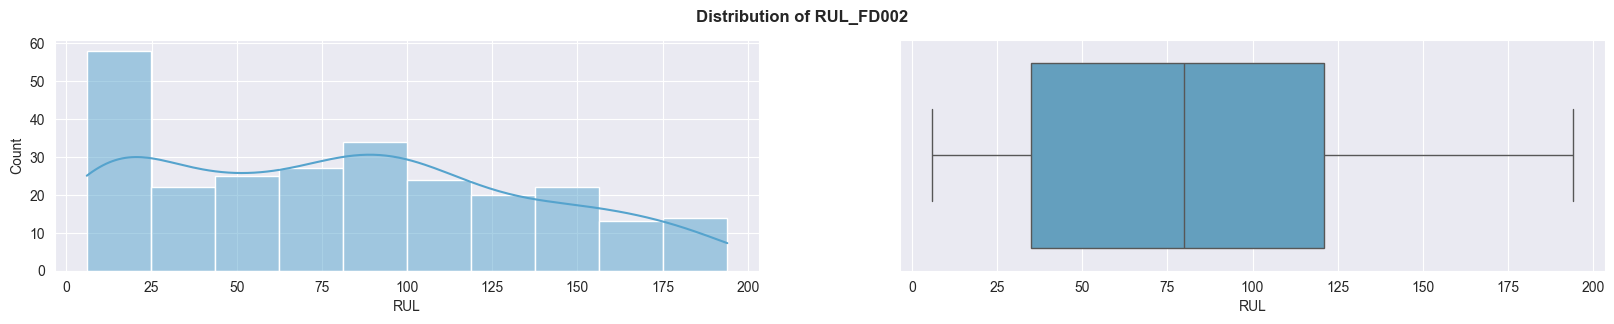

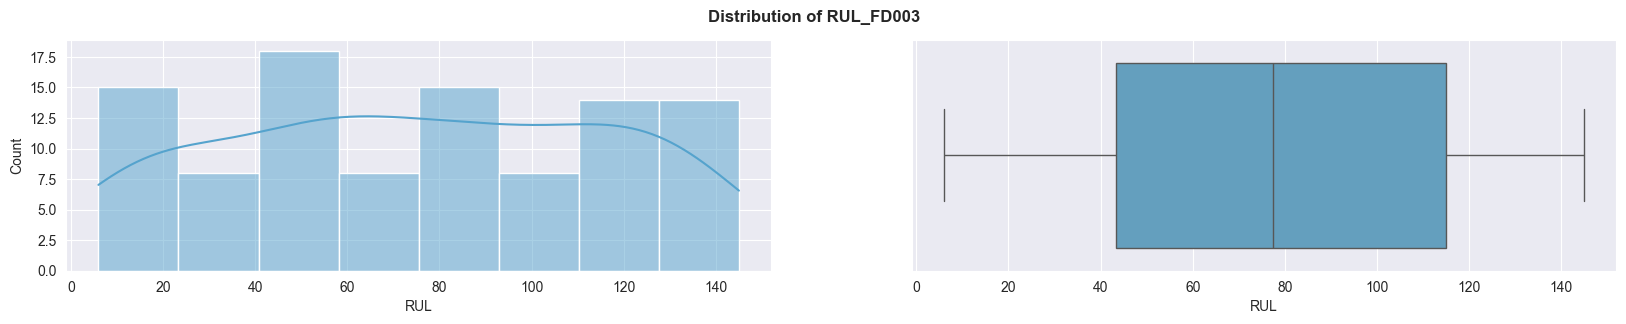

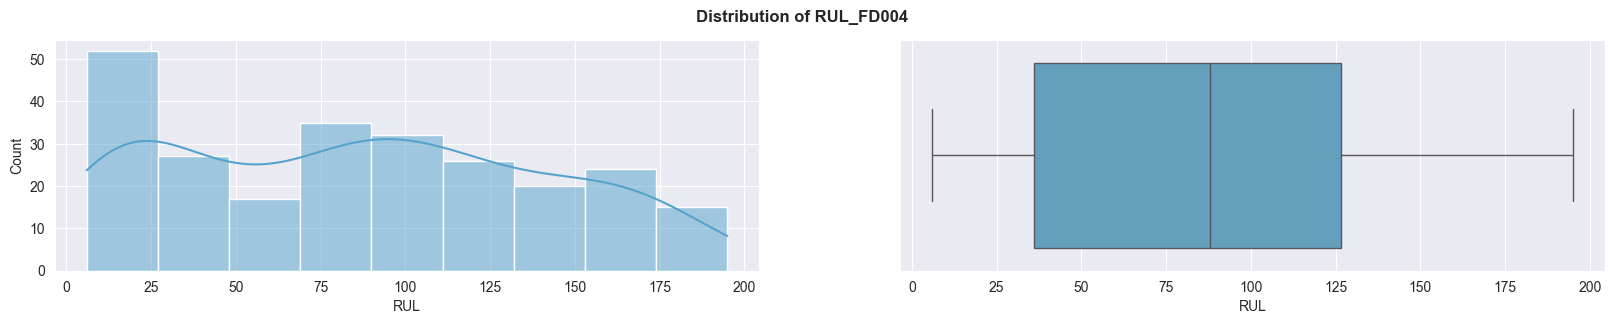

In [8]:
 # changing the index to start at 1 indicating the engine unit 
for name , df in RUL_dfs.items():
    df.index = pd.RangeIndex(start=1, stop=len(df) + 1)
    df.reset_index( names = 'engine_id', drop = False , inplace=True )
     # Plotting distribution for RUL 
    fig , ax = plt.subplots( 1, 2, figsize = (20, 3) )
    sns.histplot( x = 'RUL', data = df , kde = True , ax = ax[0] )
    sns.boxplot( x = 'RUL' , data = df , ax = ax[1] )

    plt.suptitle( f"Distribution of {name} ", fontweight = 'bold' )
    plt.show()


The graphs show that most engines in FD001 have an RUL below 20, while in FD002 and FD004, most engines have an RUL below 25. For FD003, the majority of engines have an RUL between 40 and 60. Additionally, the boxplots for all datasets show no presence of outliers, indicating a relatively consistent RUL distribution within each dataset.

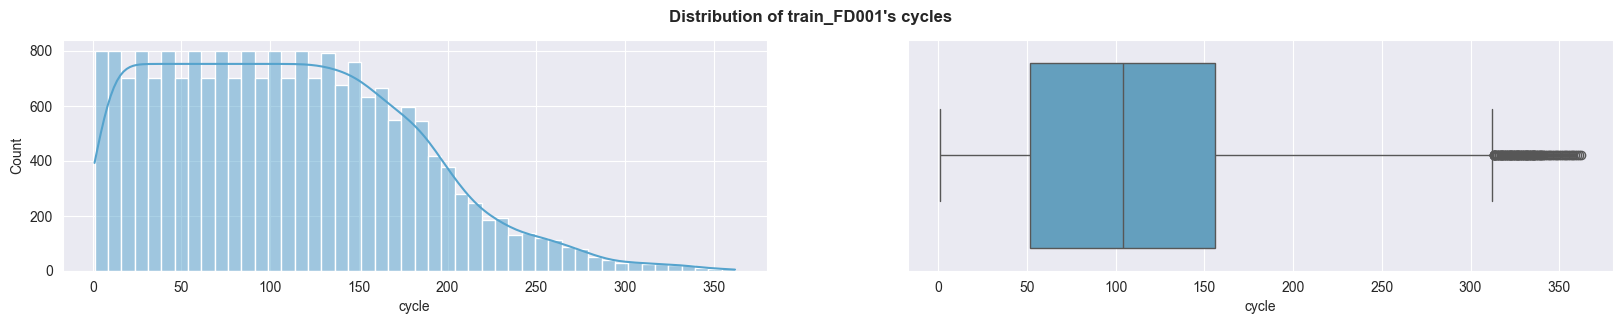

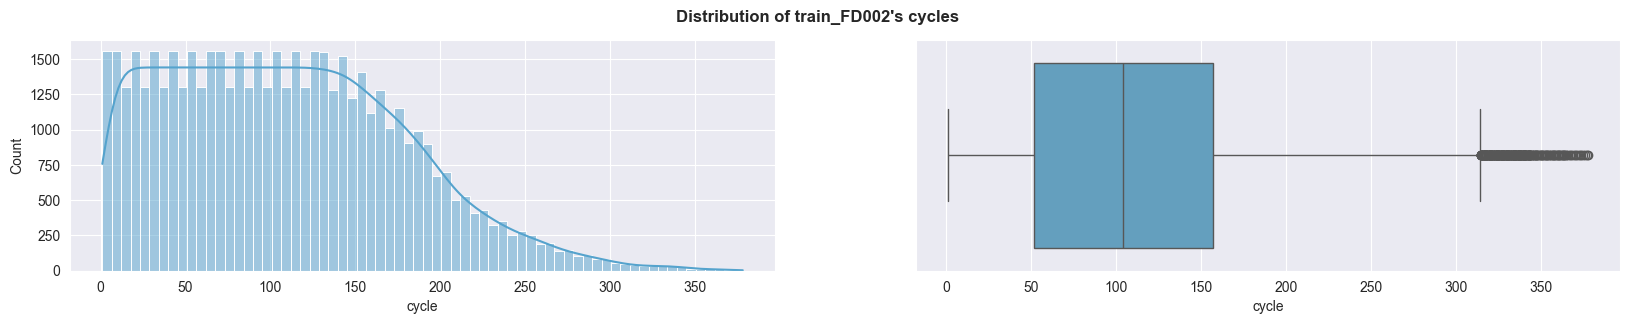

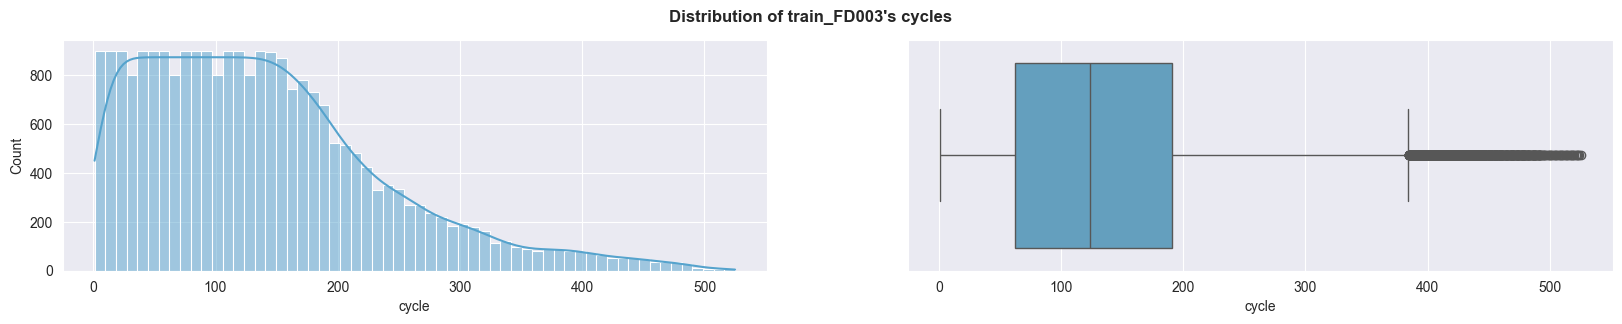

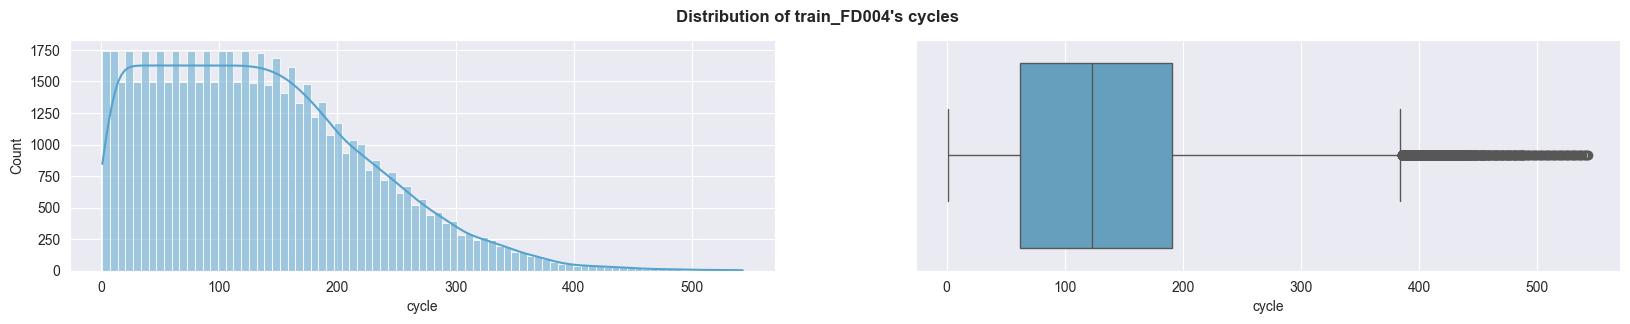

In [9]:
for name , df in train_dfs.items():

    fig , ax = plt.subplots( 1, 2, figsize = (20, 3) )
    sns.histplot( x = 'cycle', data = df , kde = True , ax = ax[0] )
    sns.boxplot( x = 'cycle' , data = df , ax = ax[1] )

    plt.suptitle( f"Distribution of {name}'s cycles ", fontweight = 'bold' )
    plt.show()

The distribution of engine cycles is right-skewed, indicating that the majority of engines have relatively shorter lifespans, while a few engines operate significantly longer—reaching up to 250 to 300 cycles and beyond. The boxplot further highlights these longer-lifespan engines as statistical outliers, suggesting that they deviate substantially from the typical operating range observed across most engines.

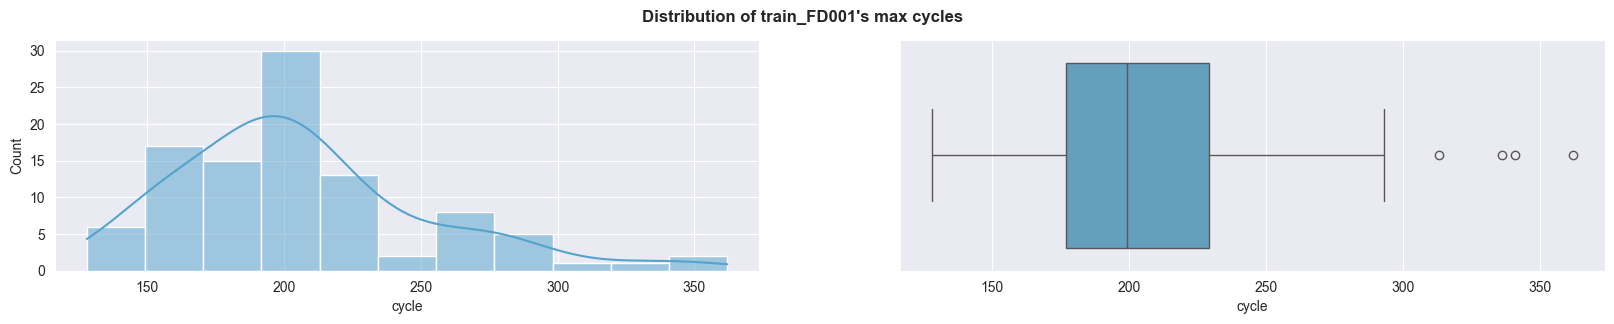

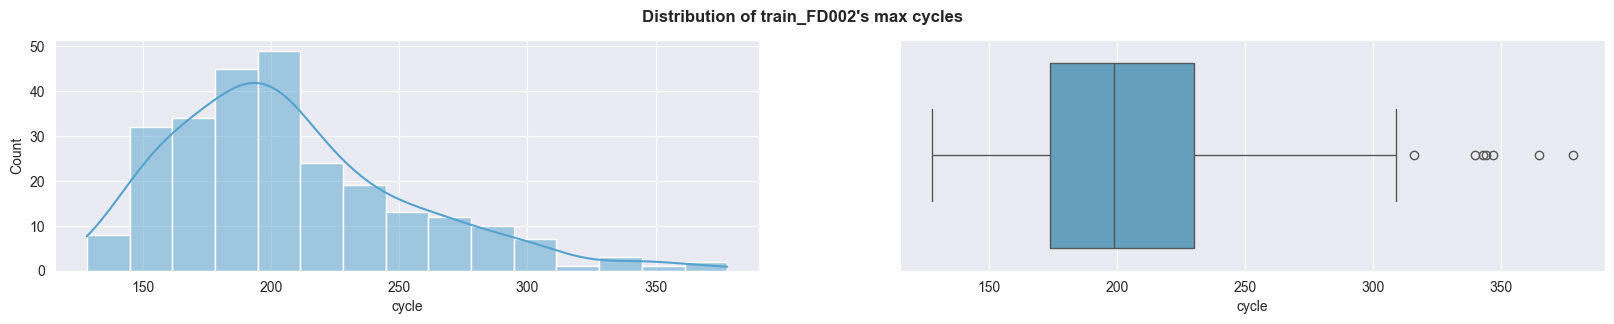

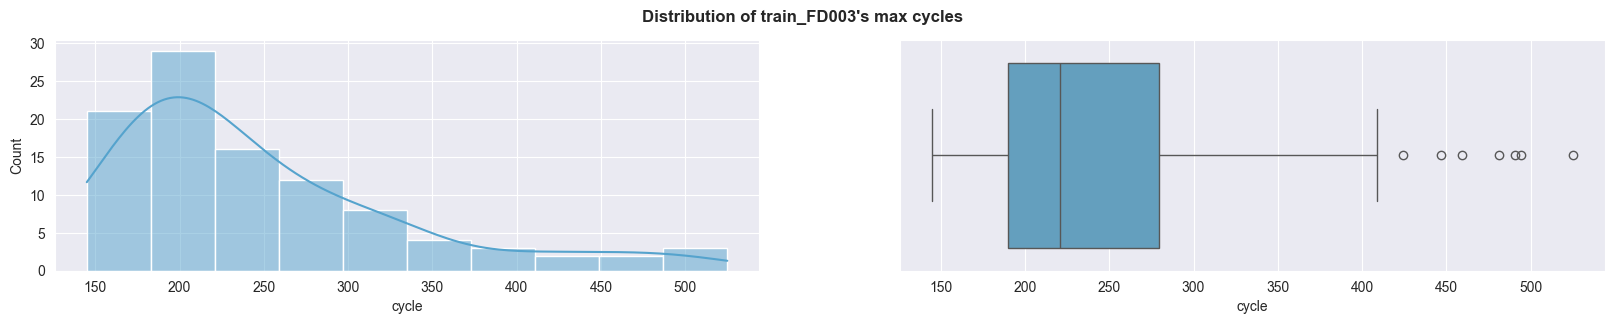

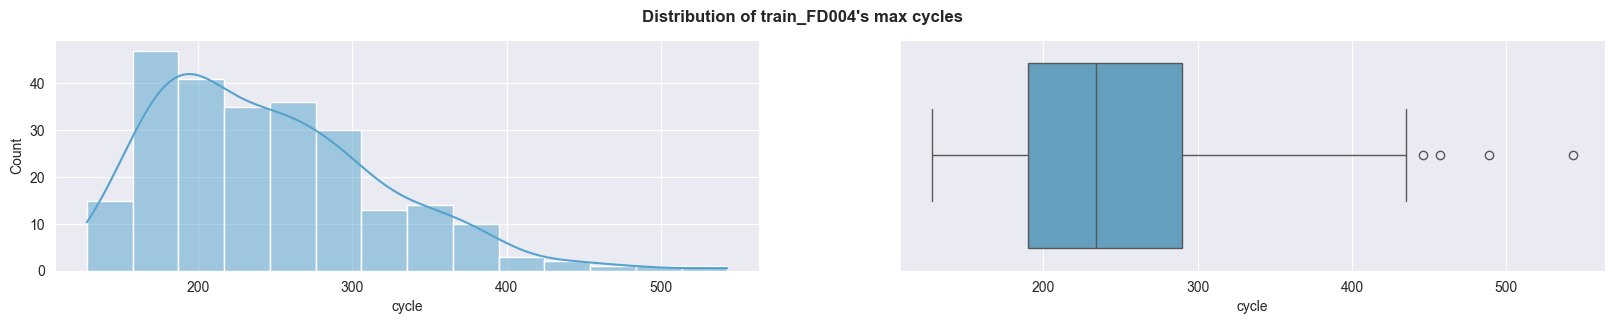

In [10]:
 # Plotting the max cycles distributions 
for name, df in train_dfs.items():
    max_cycles = df.groupby('engine_id')['cycle'].max().reset_index()

     # Plotting distributions 
    fig , ax = plt.subplots( 1, 2, figsize = (20, 3) )
    sns.histplot( x = 'cycle', data = max_cycles , kde = True , ax = ax[0] )
    sns.boxplot( x = 'cycle' , data = max_cycles , ax = ax[1] )

    plt.suptitle( f"Distribution of {name}'s max cycles ", fontweight = 'bold' )
    plt.show()

The distribution of maximum engine cycles further confirms that most engines experience shorter lifespans. Engines with lifespans ranging from 250 to 300 cycles and above are relatively rare and are identified as outliers, reinforcing the skewed nature of the data.

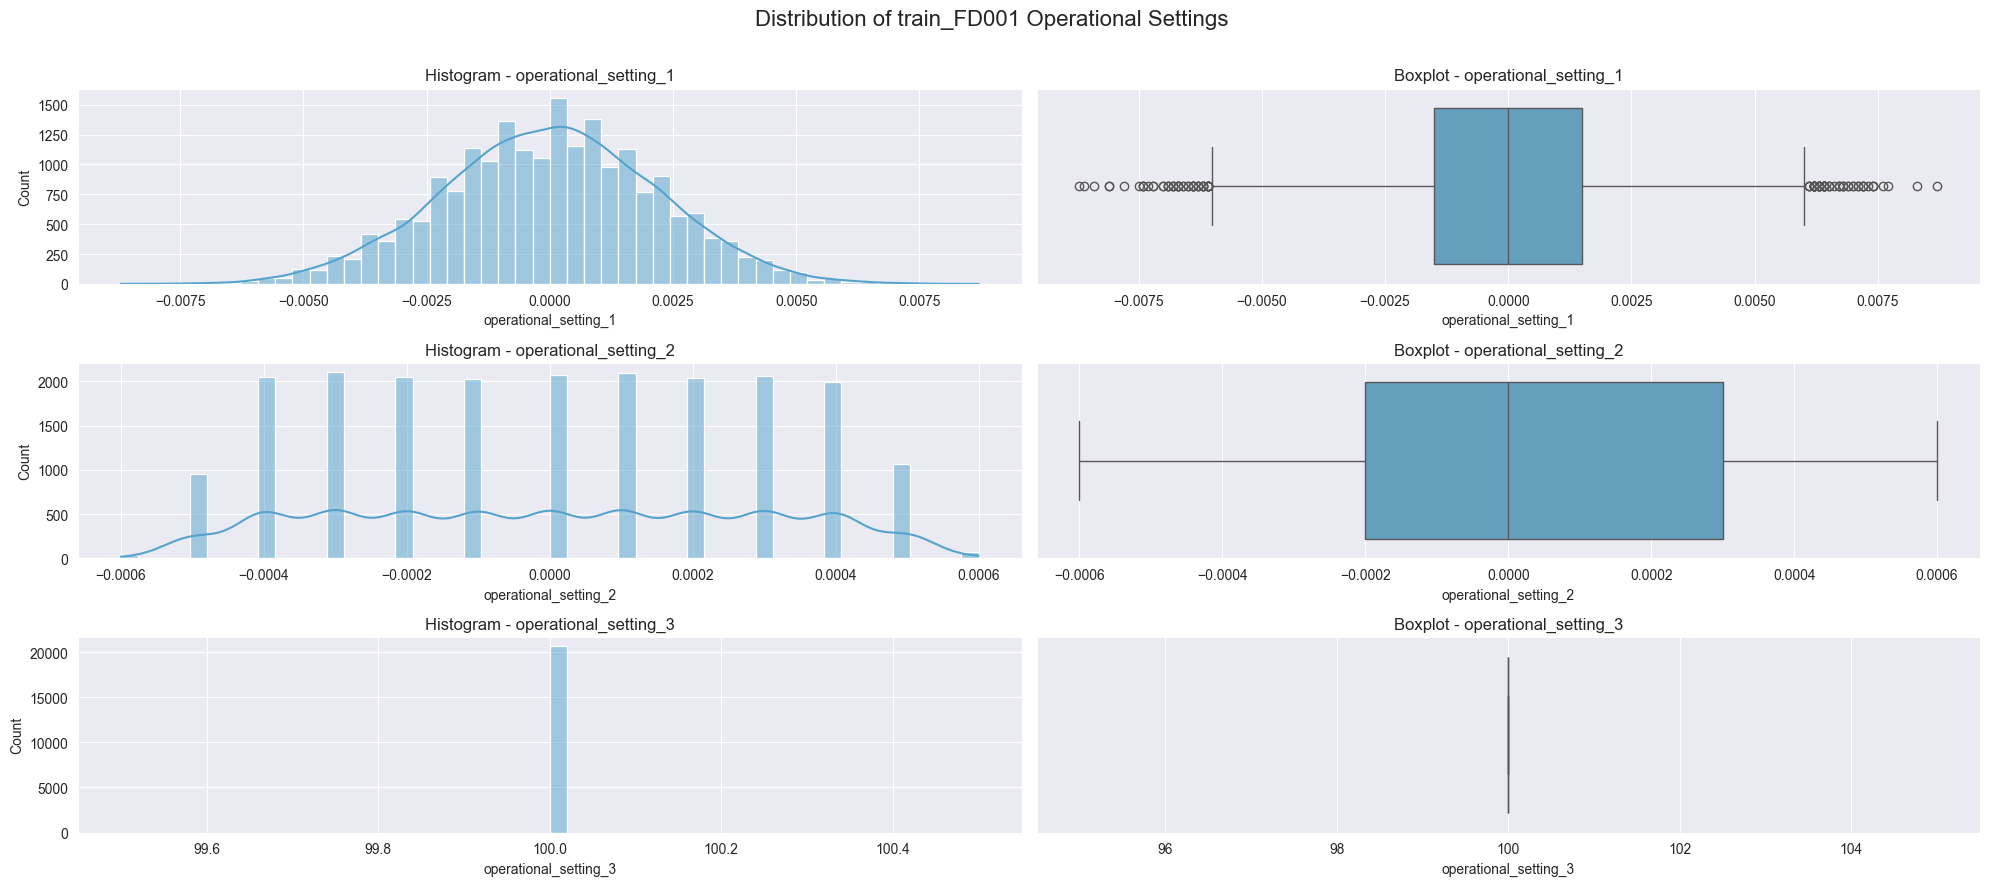

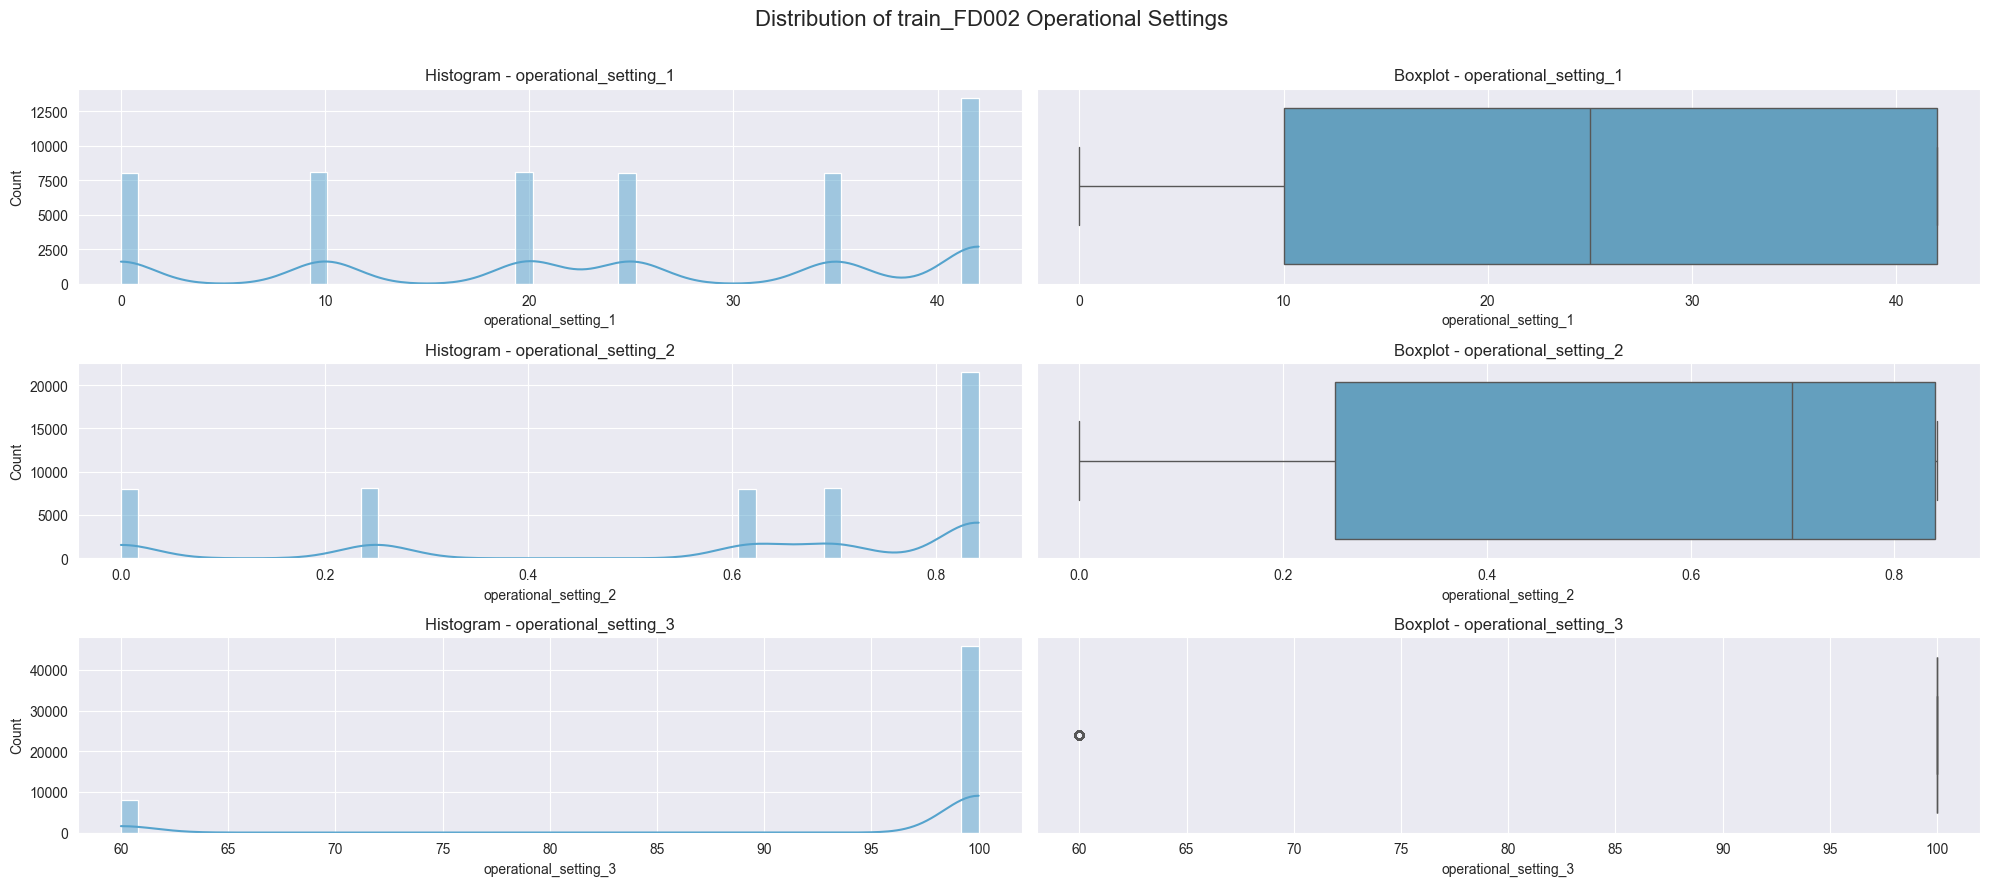

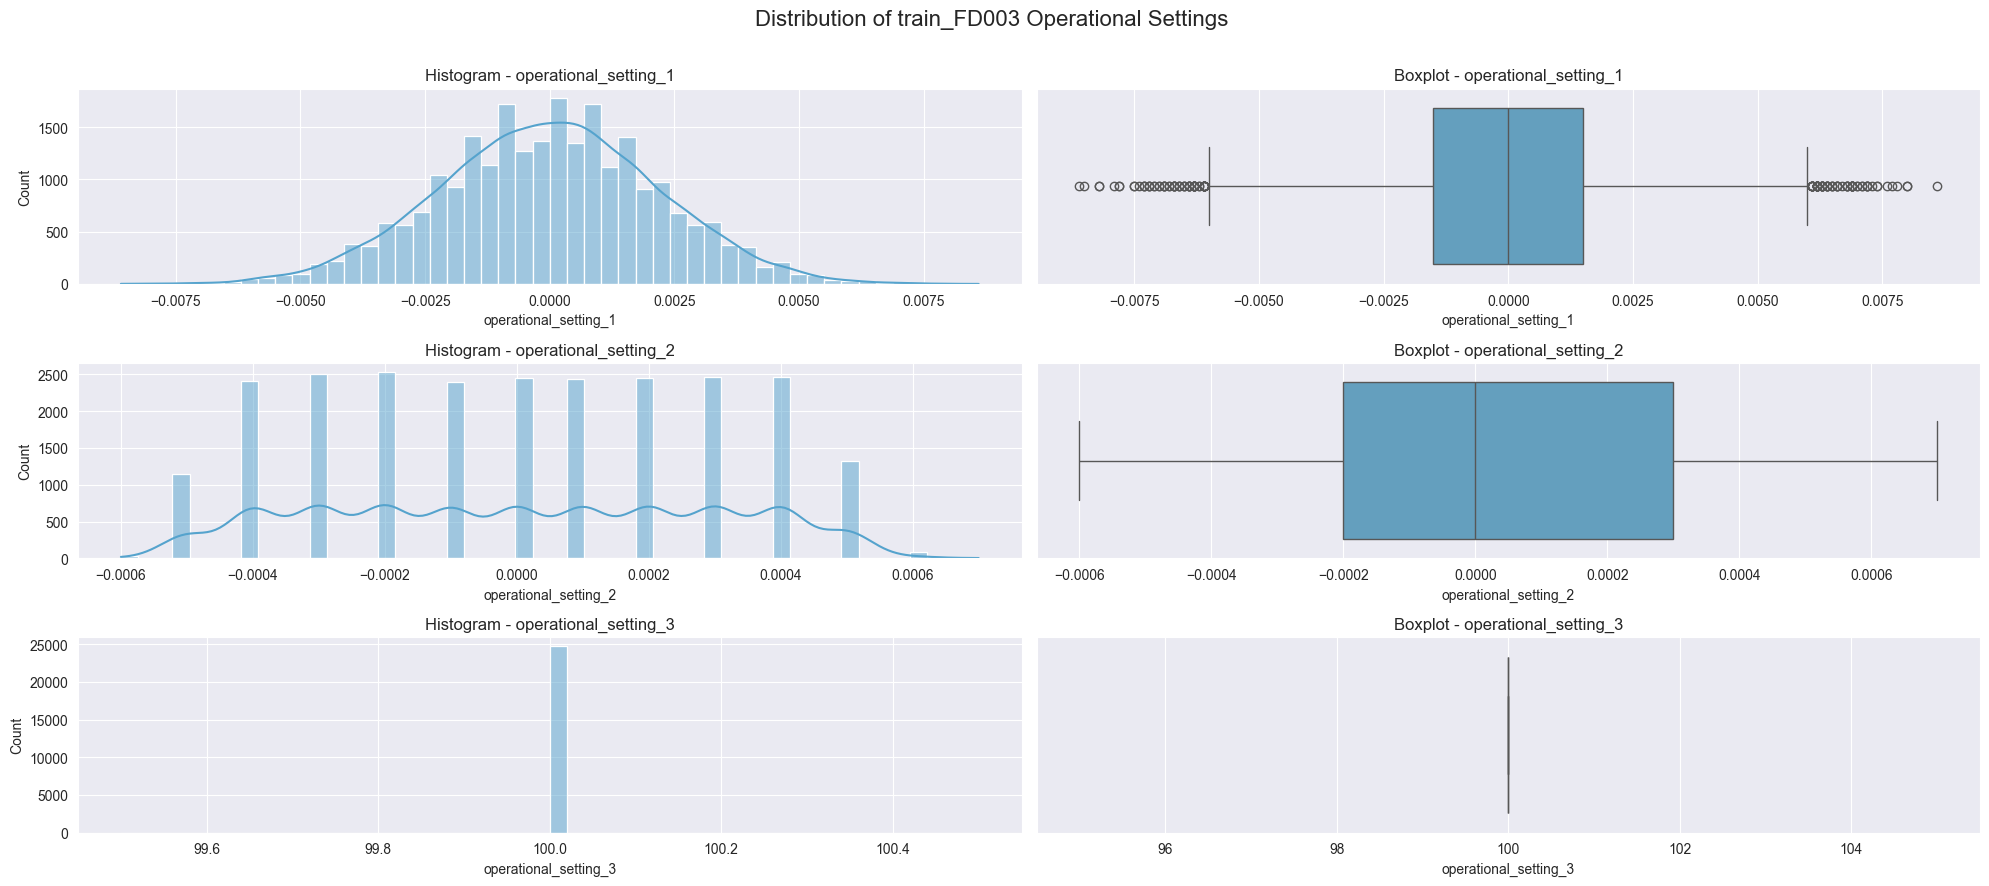

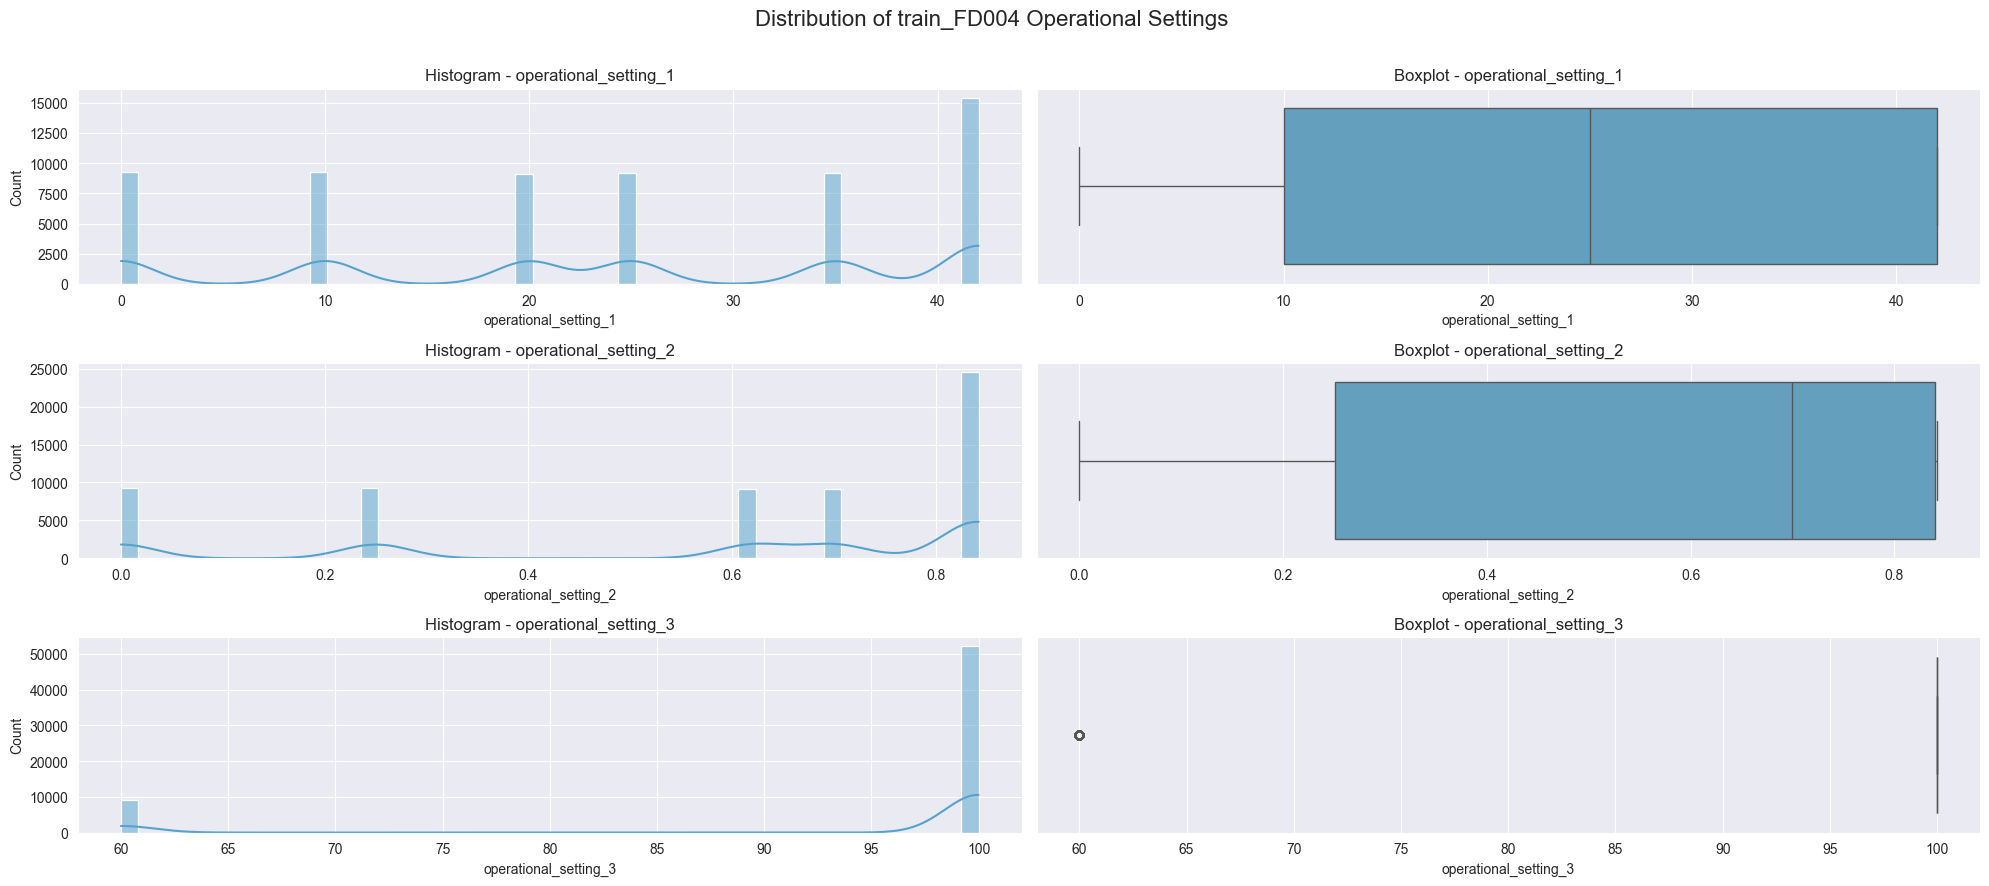

In [11]:
for name, df in train_dfs.items():
    opp_sett_col = df.iloc[:, 2:5]  
    num_cols = len(opp_sett_col.columns)

    fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(20, 3 * num_cols))

    if num_cols == 1:
        axes = [axes]

    for i, col in enumerate(opp_sett_col.columns):
        sns.histplot(opp_sett_col[col], kde=True, bins=50, ax=axes[i][0])
        axes[i][0].set_title(f'Histogram - {col}')
        axes[i][0].set_xlabel(col)

        sns.boxplot(x=opp_sett_col[col], ax=axes[i][1])
        axes[i][1].set_title(f'Boxplot - {col}')
        axes[i][1].set_xlabel(col)

    fig.suptitle(f"Distribution of {name} Operational Settings ", fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.97])  
    plt.show()


The output indicates the presence of multimodal distributions in both the training and testing datasets. This suggests potential differences between engines such as varying operational settings or usage conditions implying that each engine may have operated under distinct environments or stress levels.
Here’s a more formal and refined version:

Certain operational settings exhibit very low variability in their distributions, indicating limited informational value. Such low variance features may be considered as noise and can be safely dropped during the feature selection process to enhance model performance and reduce dimensionality.

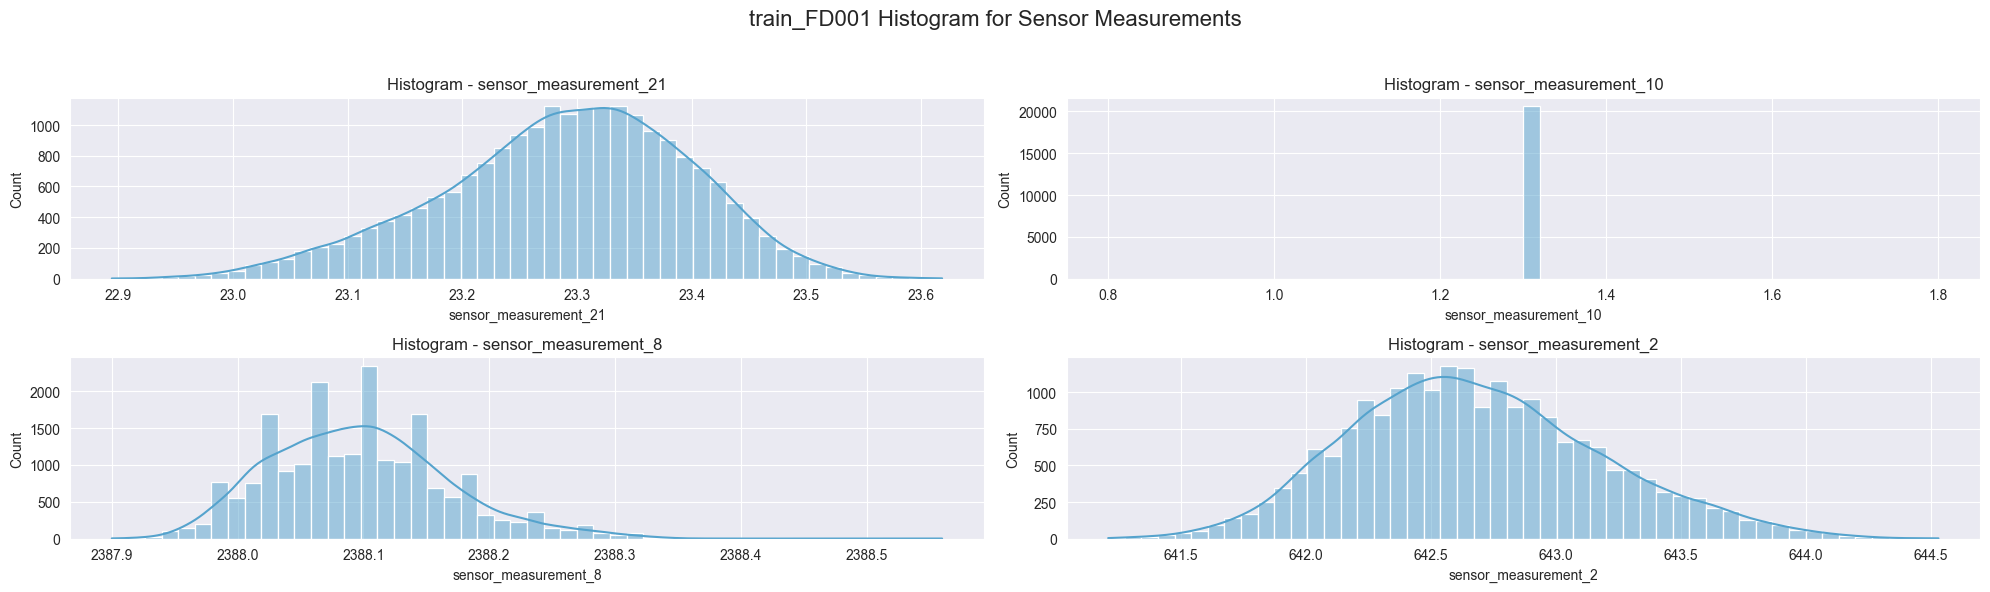

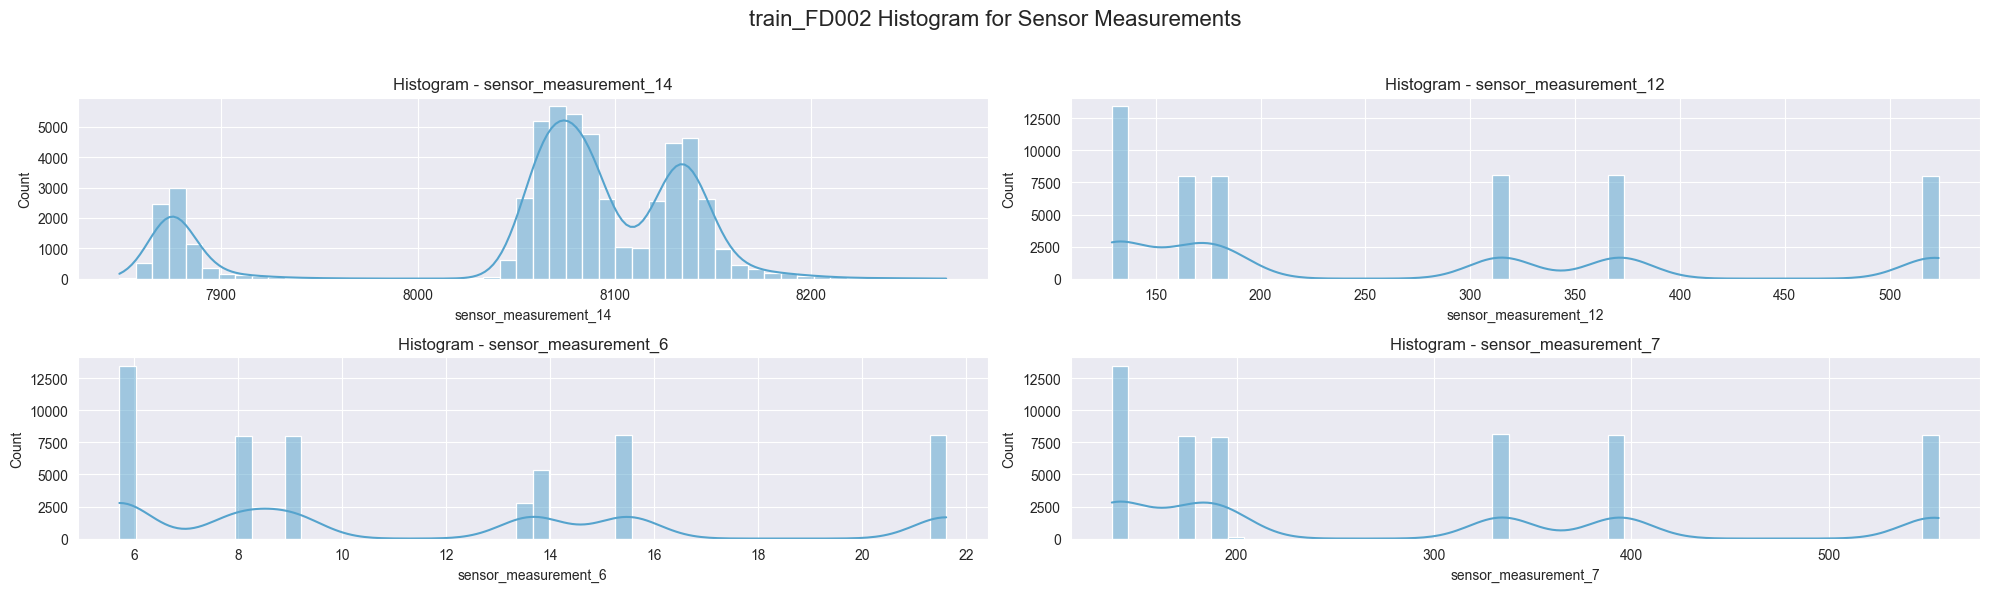

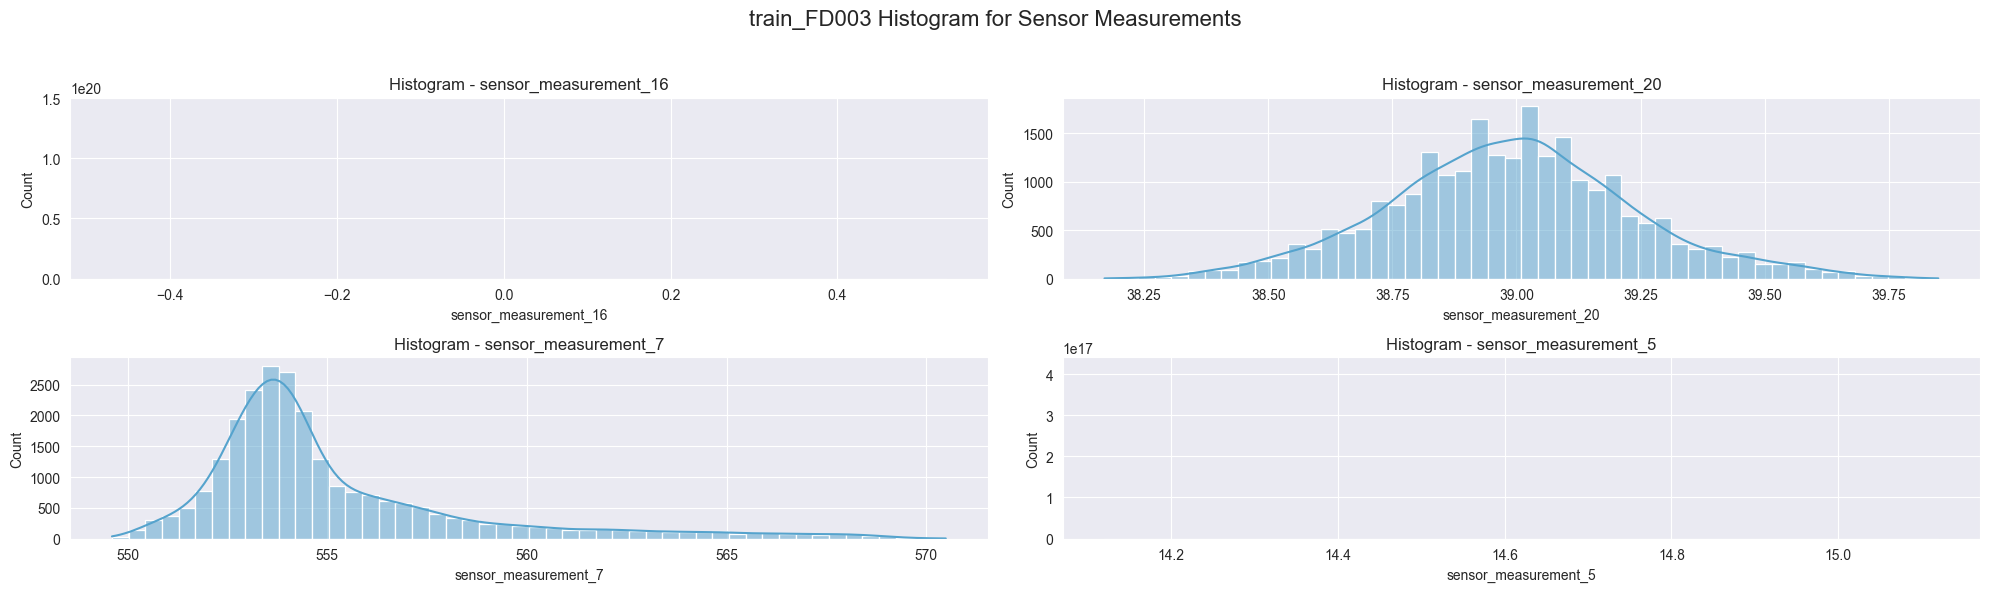

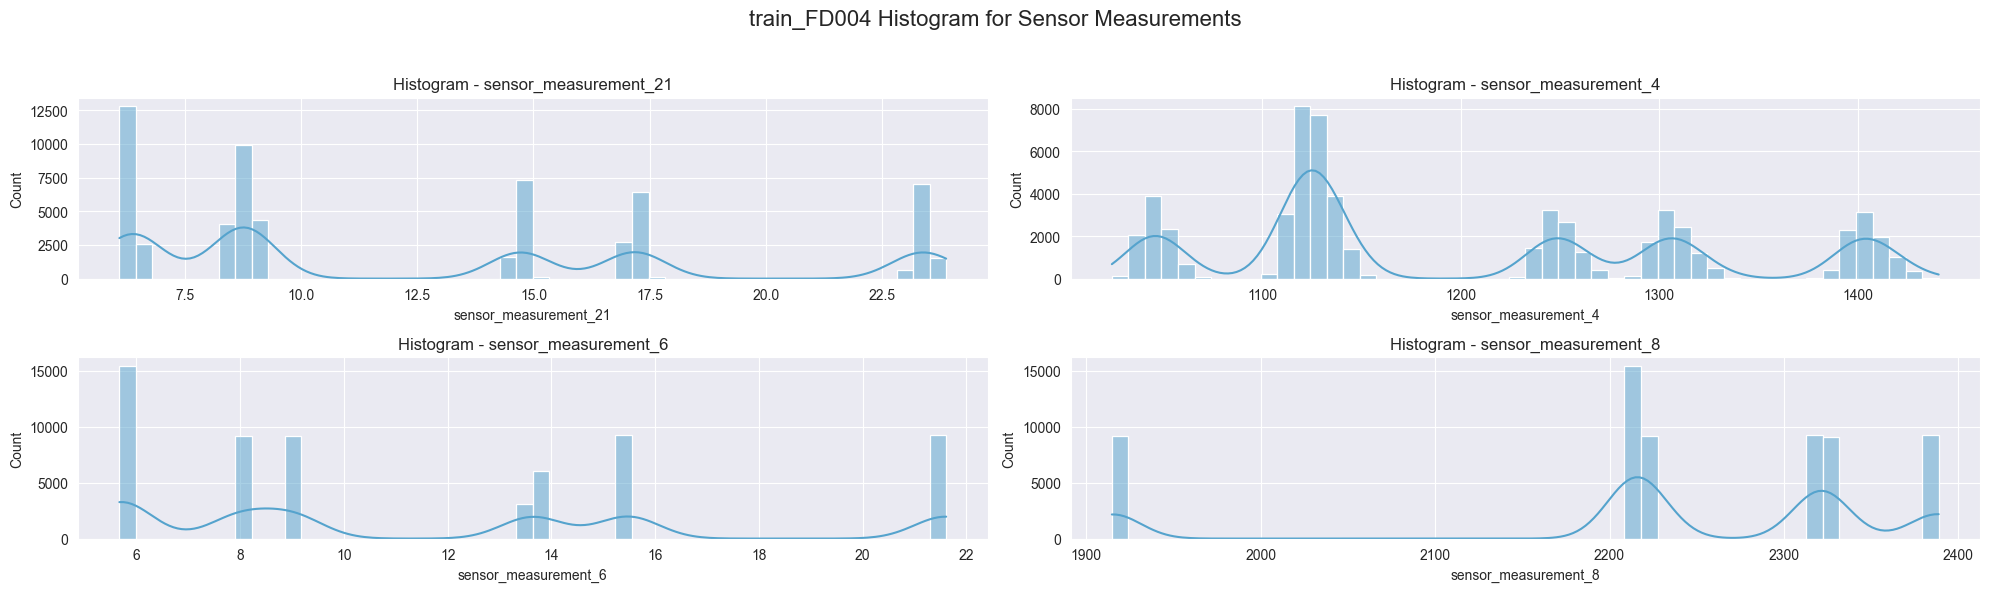

In [12]:
for name, df in train_dfs.items():

    sensor_cols = df.iloc[:, 5:]
    numeric_cols = sensor_cols.select_dtypes(include='number')

    if numeric_cols.shape[1] < 4:
        print(f"Not enough numeric columns")
        continue

    selected_cols = rd.sample(list(numeric_cols.columns), 4)

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
    axes = axes.flatten()

    for i, col in enumerate(selected_cols):
        sns.histplot(numeric_cols[col].dropna(), kde=True, bins=50, ax=axes[i])
        axes[i].set_title(f'Histogram - {col}')
        axes[i].set_xlabel(col)

    fig.suptitle(f"{name} Histogram for Sensor Measurements", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

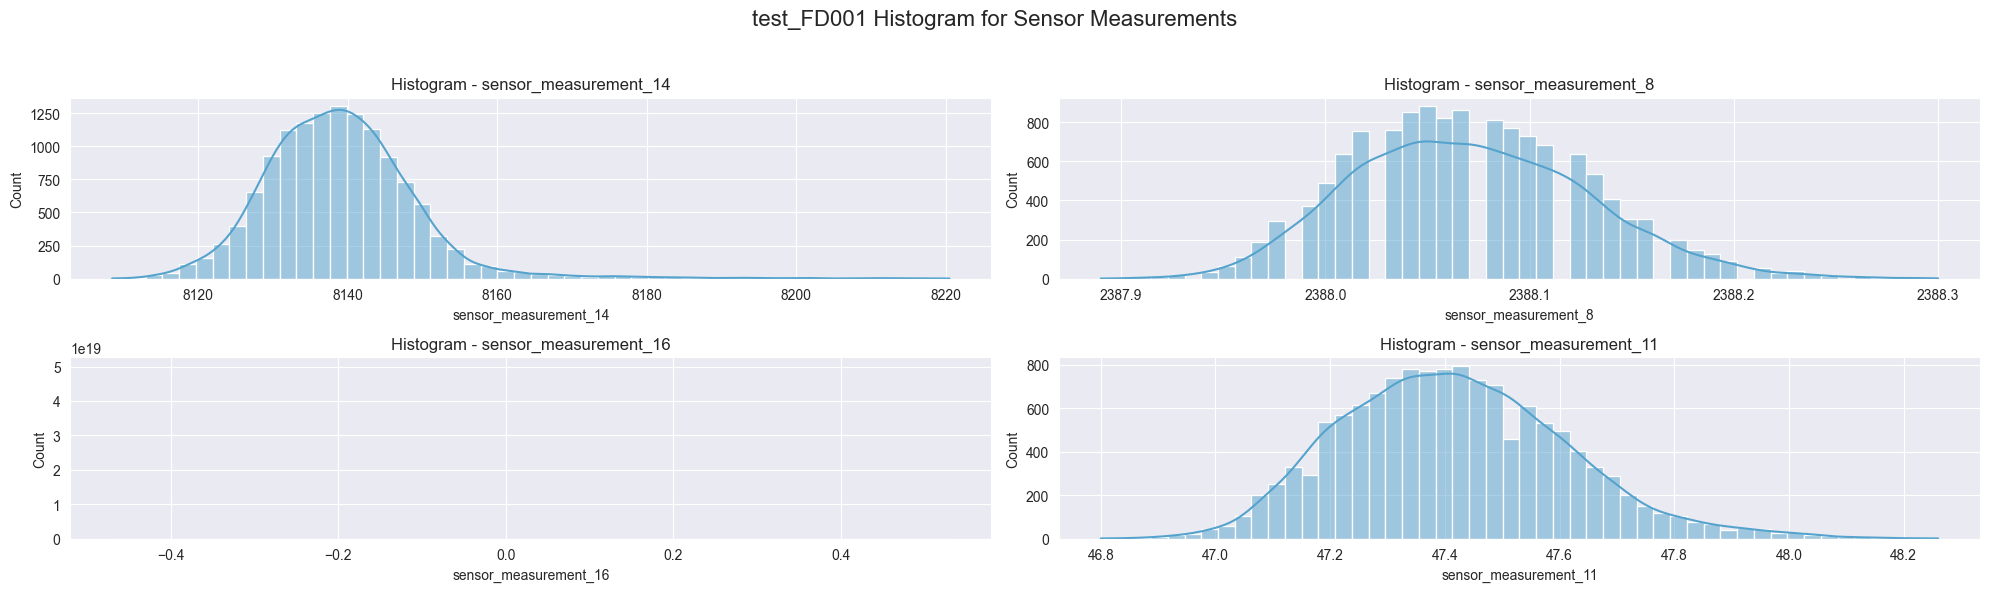

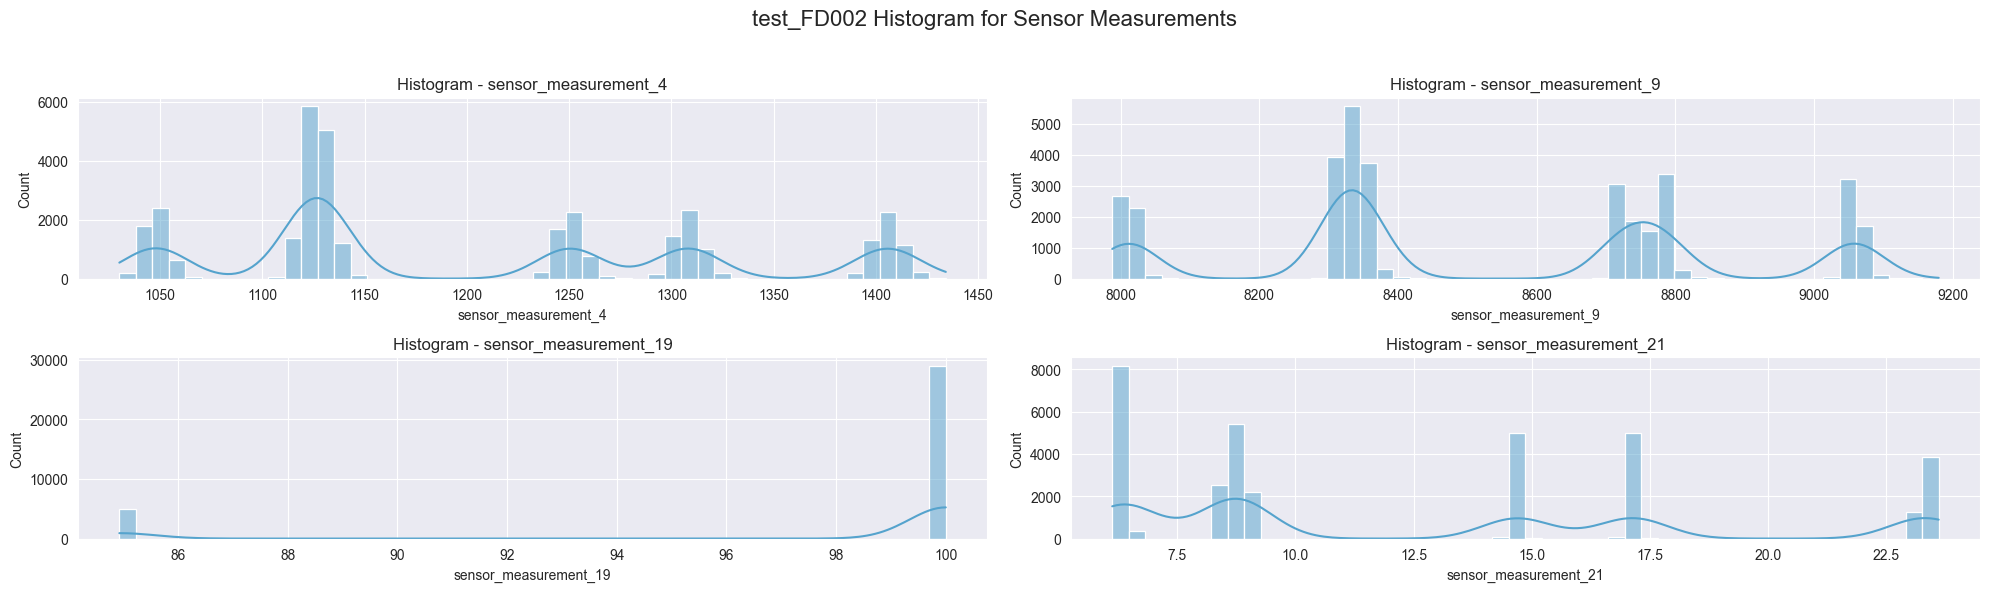

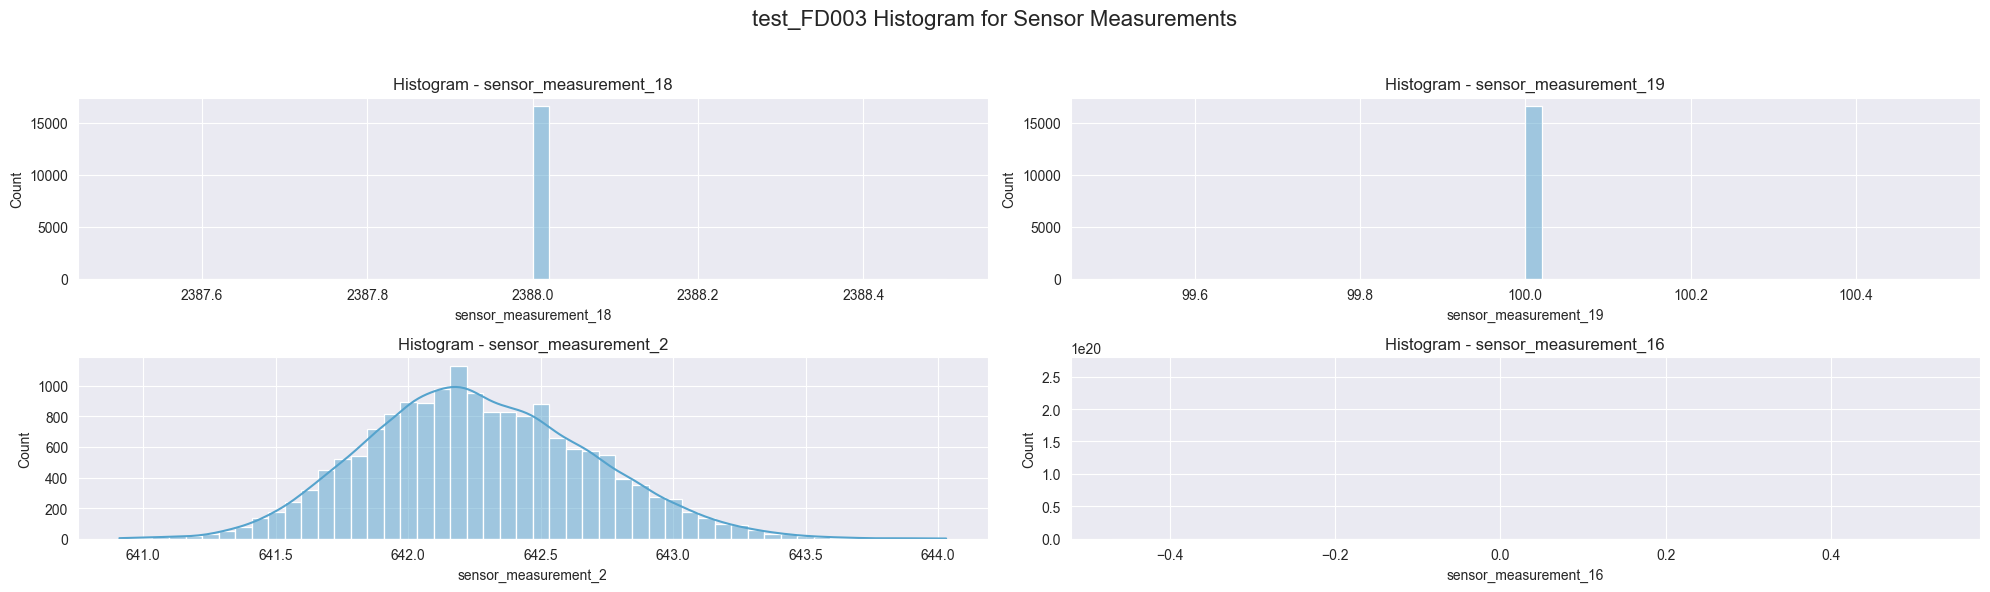

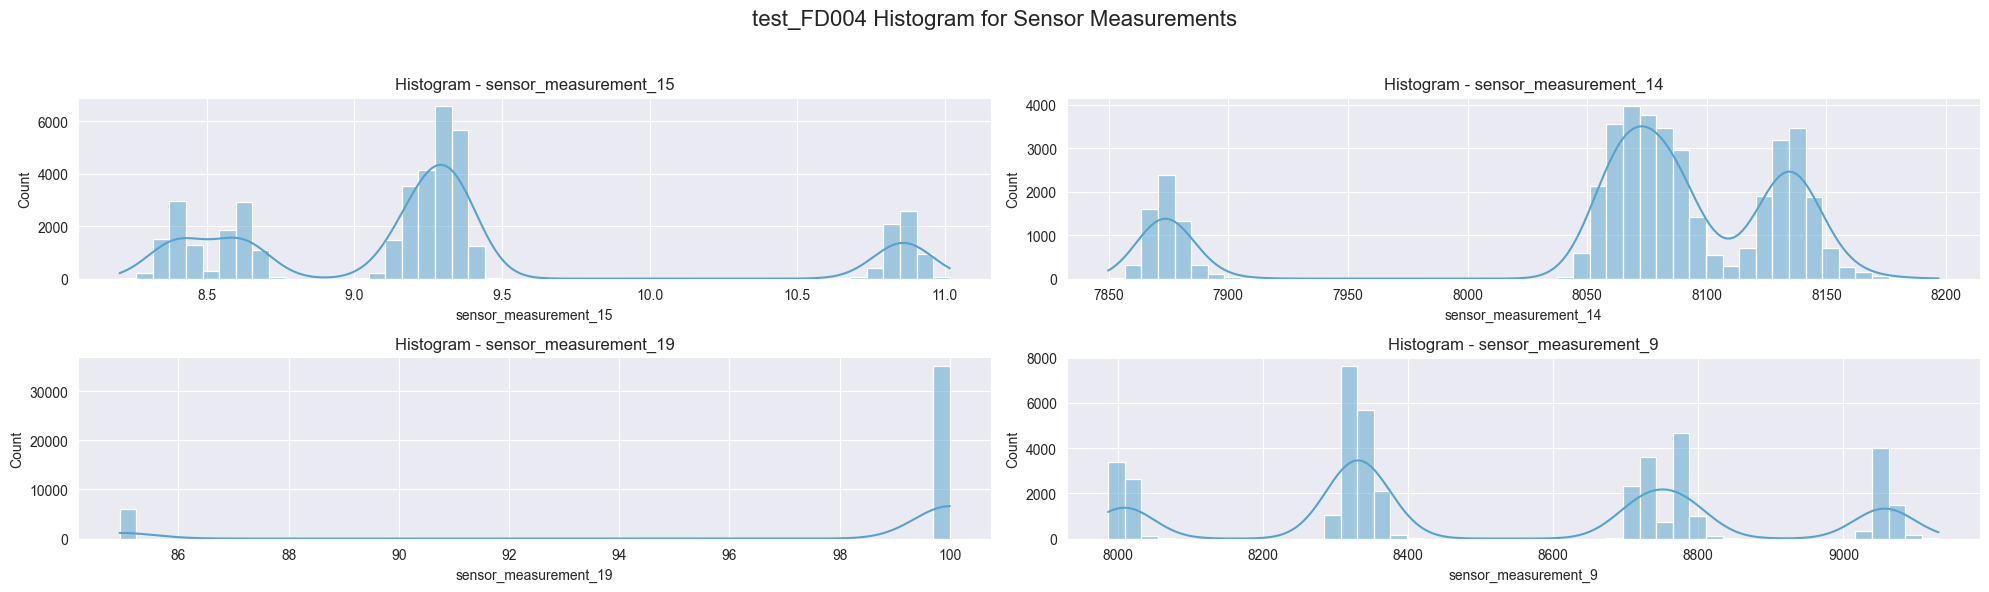

In [16]:
 # Test Data 
for name, df in test_dfs.items():

    sensor_cols = df.iloc[:, 5:]
    numeric_cols = sensor_cols.select_dtypes(include='number')

    if numeric_cols.shape[1] < 4:
        print(f"Not enough numeric columns")
        continue

    selected_cols = rd.sample(list(numeric_cols.columns), 4)

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
    axes = axes.flatten()

    for i, col in enumerate(selected_cols):
        sns.histplot(numeric_cols[col].dropna(), kde=True, bins=50, ax=axes[i])
        axes[i].set_title(f'Histogram - {col}')
        axes[i].set_xlabel(col)

    fig.suptitle(f"{name} Histogram for Sensor Measurements", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

The plots of sensor measurements display a variety of distribution patterns—some follow a normal distribution, others are skewed, and a few exhibit multimodal characteristics. This diversity suggests underlying differences in engine behavior or operational cycles, potentially indicating that engines function under varying conditions or stress levels.

C:\Users\HomePC\AppData\Local\Temp\ipykernel_17588\1920587825.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


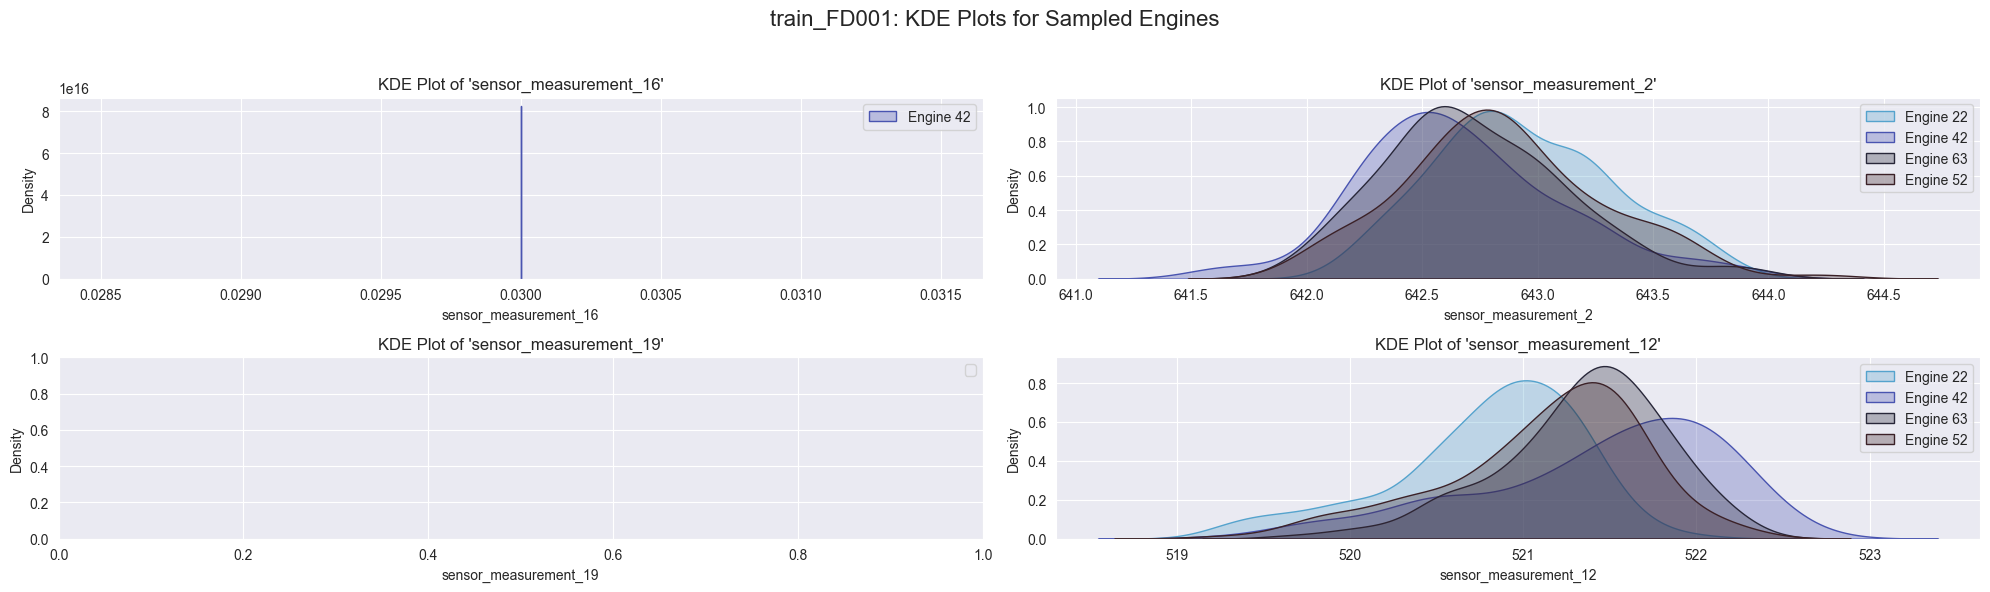

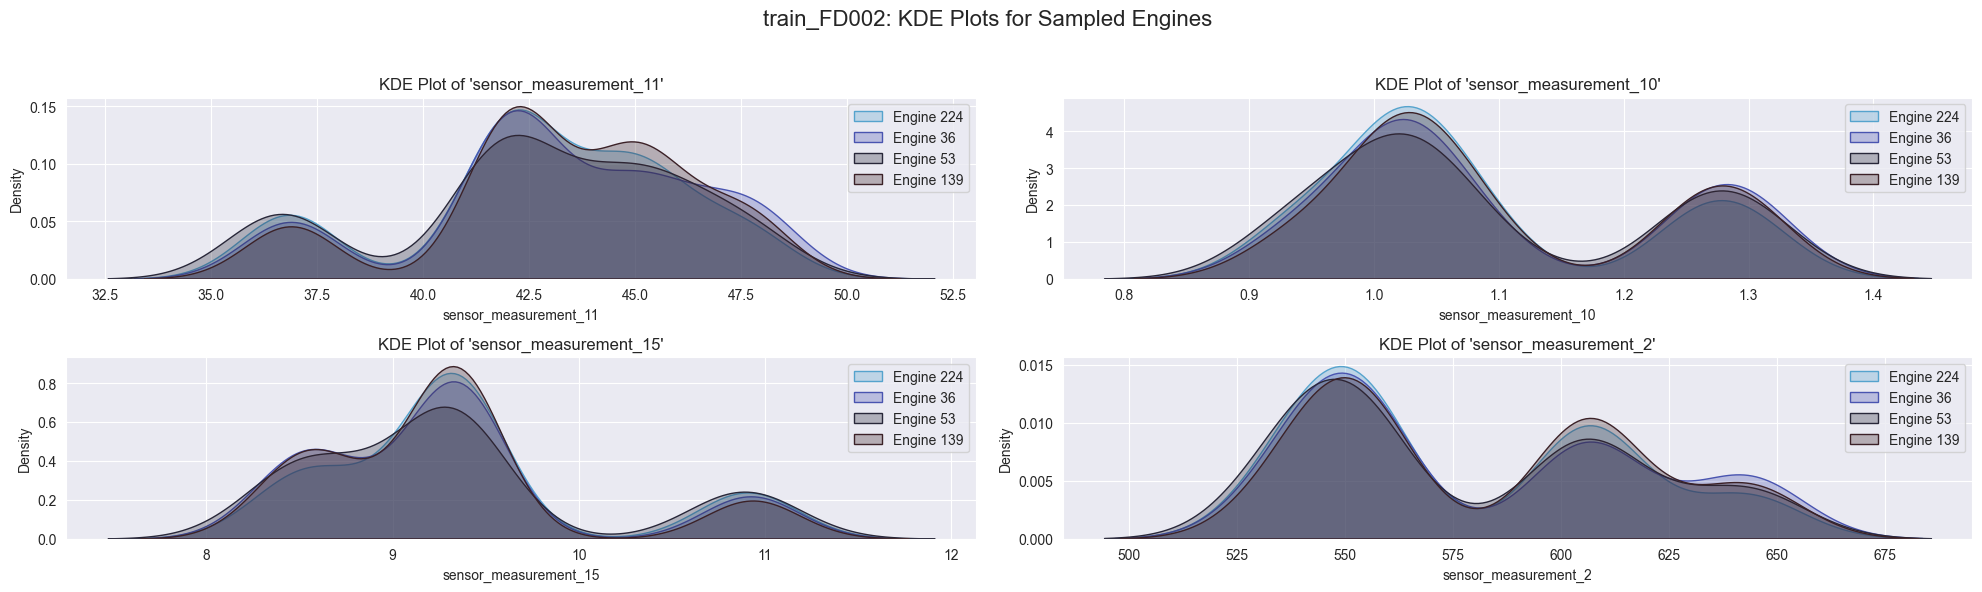

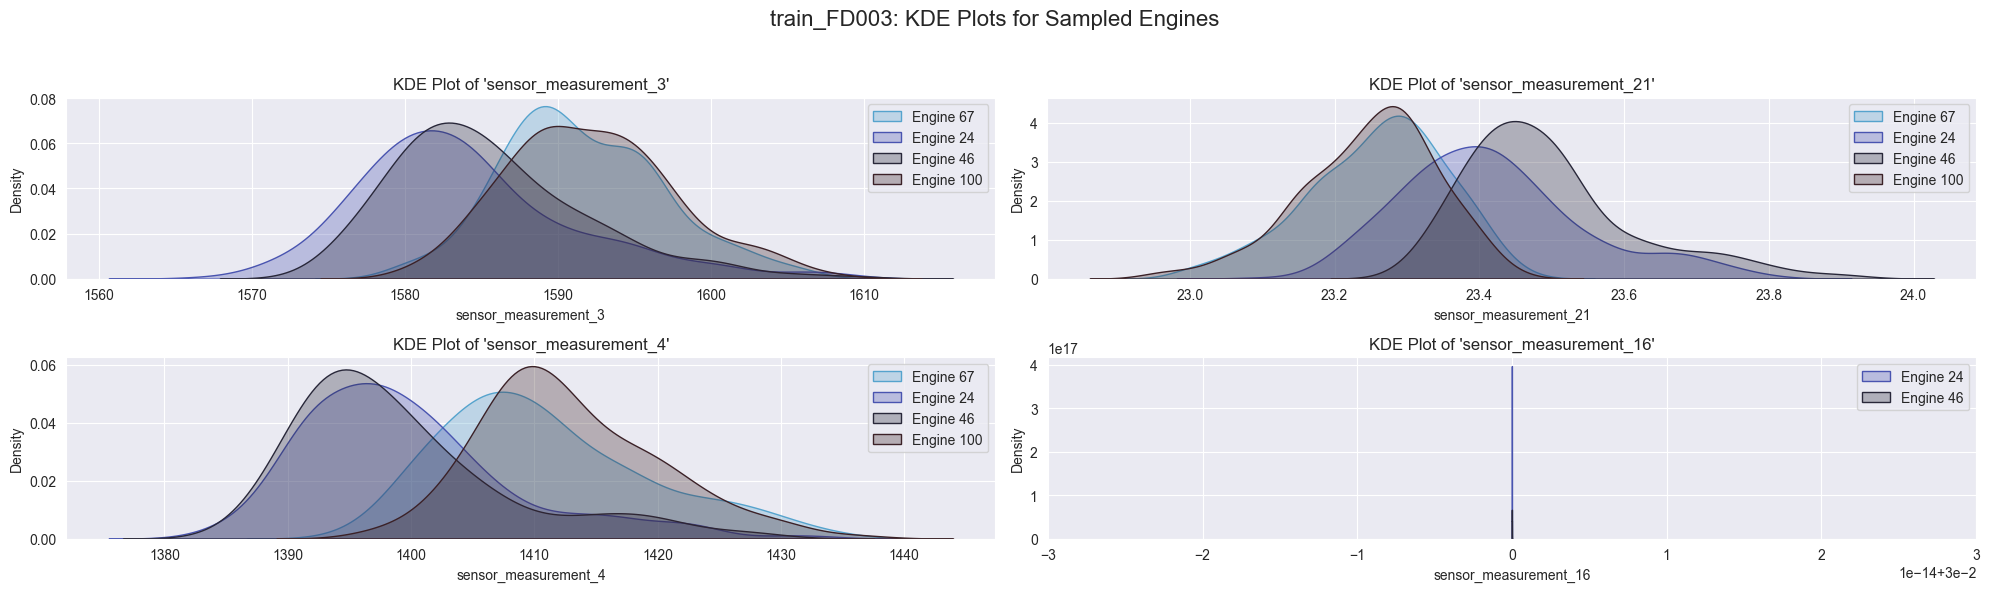

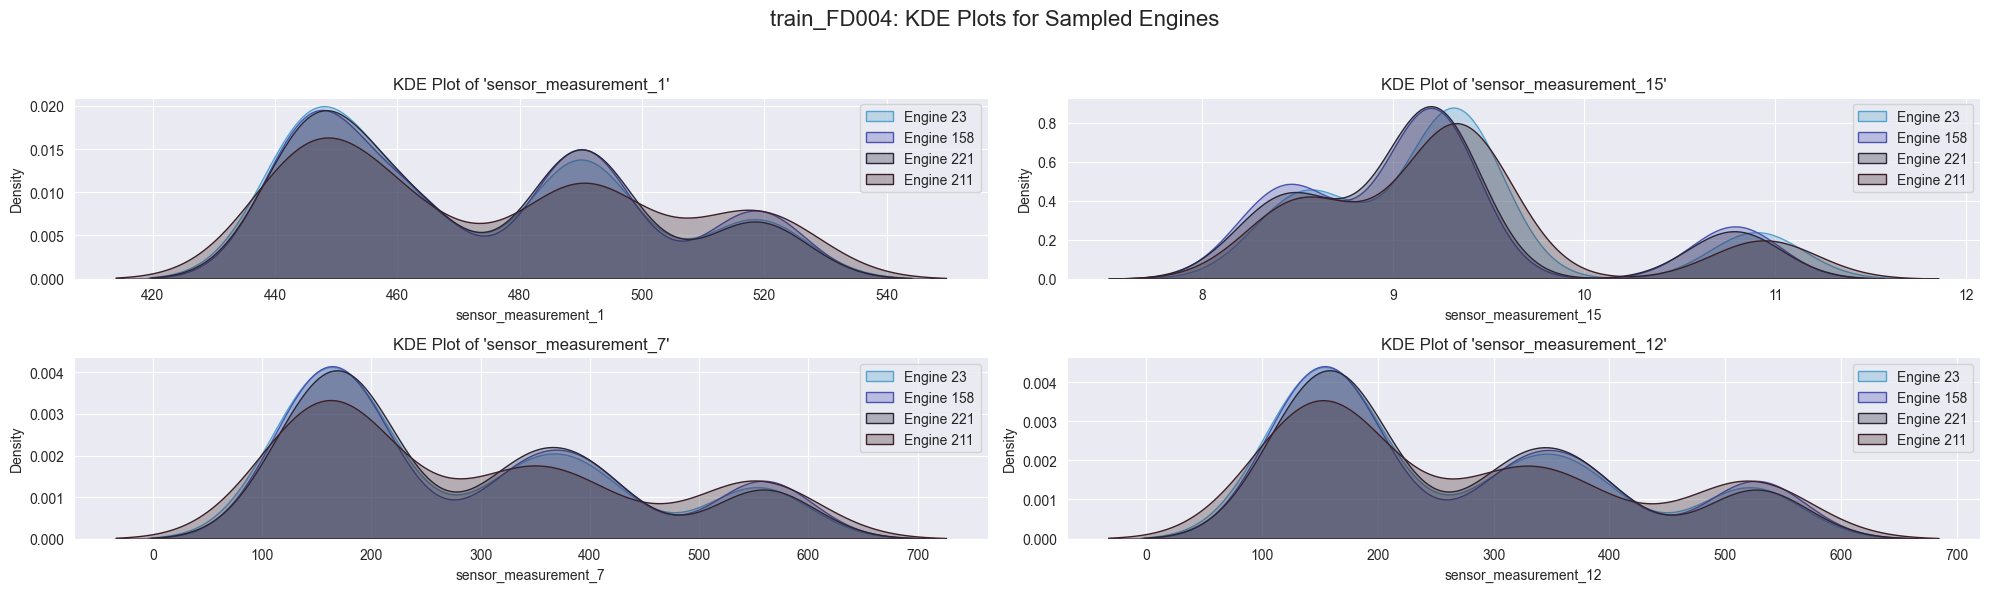

In [ ]:
 # Train Data
for name , df  in train_dfs.items():
    # Sampling Engines
    engine_list = df['engine_id'].unique()
    sample_engines = rd.sample(list(engine_list), 4)

    
    # Sampling Cycles
    sensor_cols = df.iloc[:, 5:]
    numeric_sensors = sensor_cols.select_dtypes(include='number')

    if numeric_sensors.shape[1] < 4:
        print(f"Not enough numeric columns")
        continue

    selected_sensors = rd.sample(list(numeric_sensors.columns), 4)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
    axes = axes.flatten()

    for i, sensor in enumerate(selected_sensors):
        ax = axes[i]
        for eng in sample_engines:
            engine_data = df[df['engine_id'] == eng][sensor]

            if engine_data.var() > 0:
                sns.kdeplot(engine_data, label=f'Engine {eng}', fill=True, alpha=0.3, ax=ax, warn_singular=False)
                

        ax.set_title(f"KDE Plot of '{sensor}'")
        ax.set_xlabel(sensor)
        ax.set_ylabel("Density")
        ax.legend()

    # Step 6: Layout and show
    plt.suptitle(f"{name}: KDE Plots for Sampled Engines", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


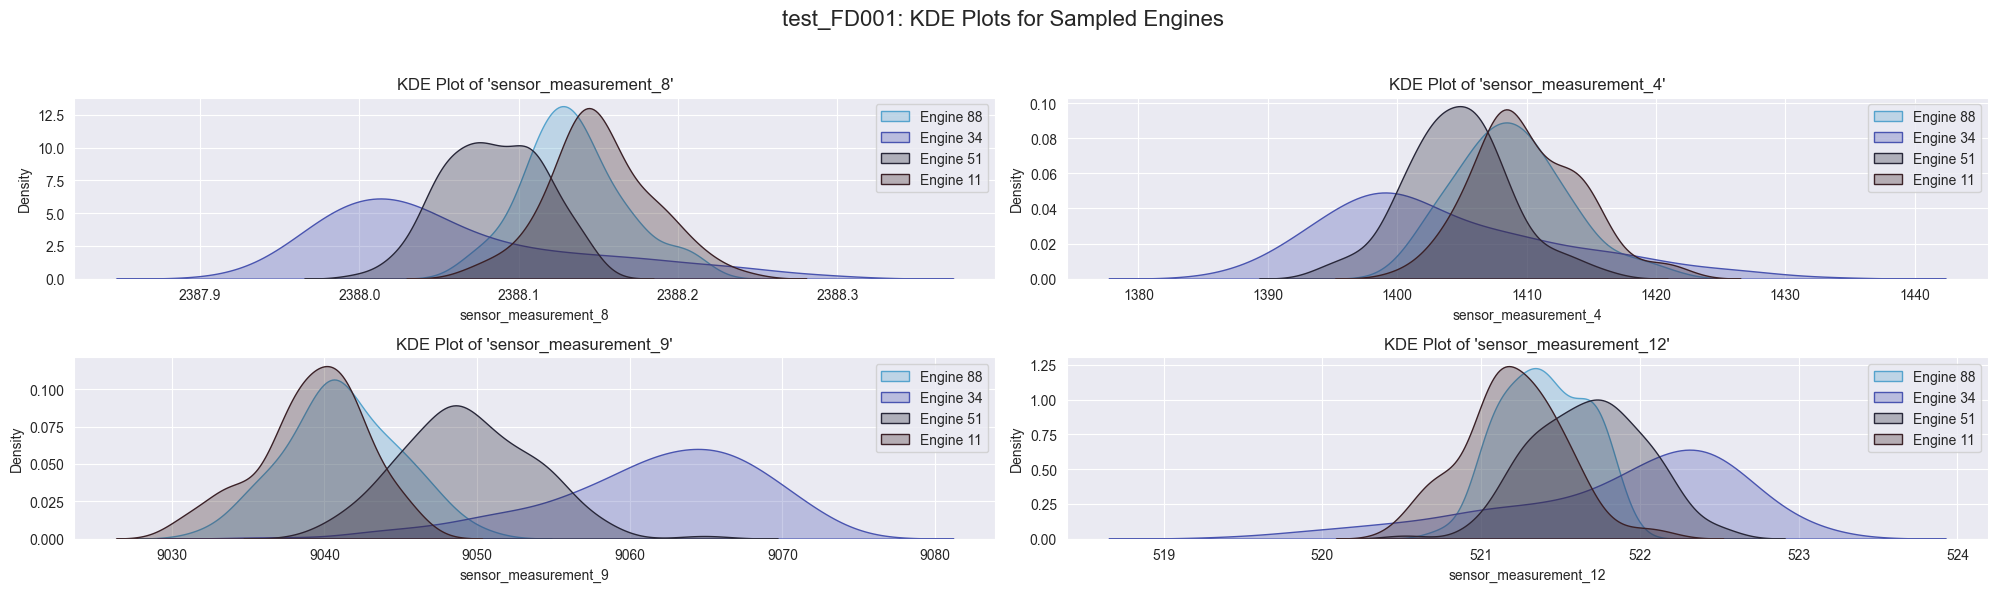

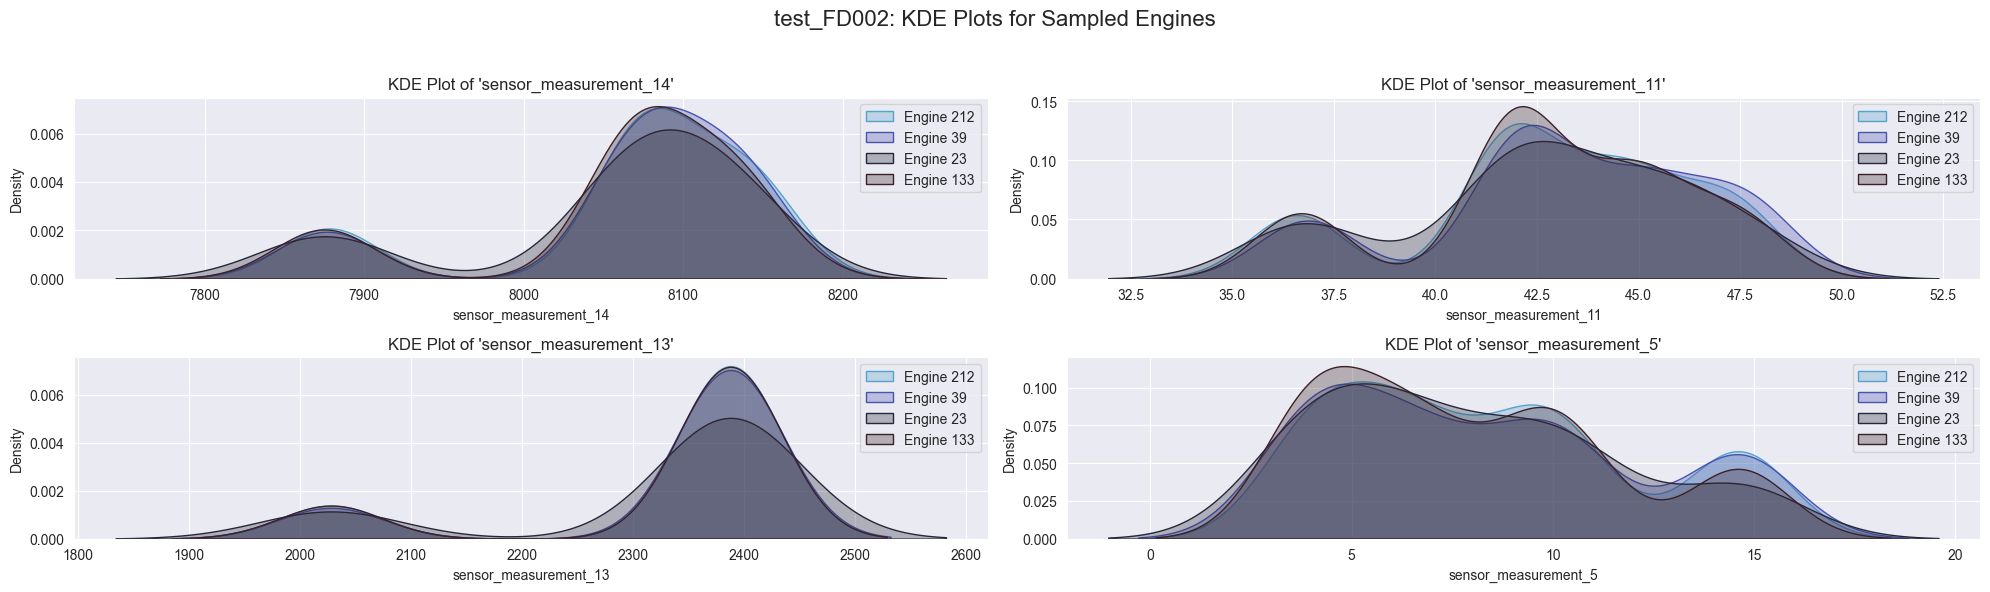

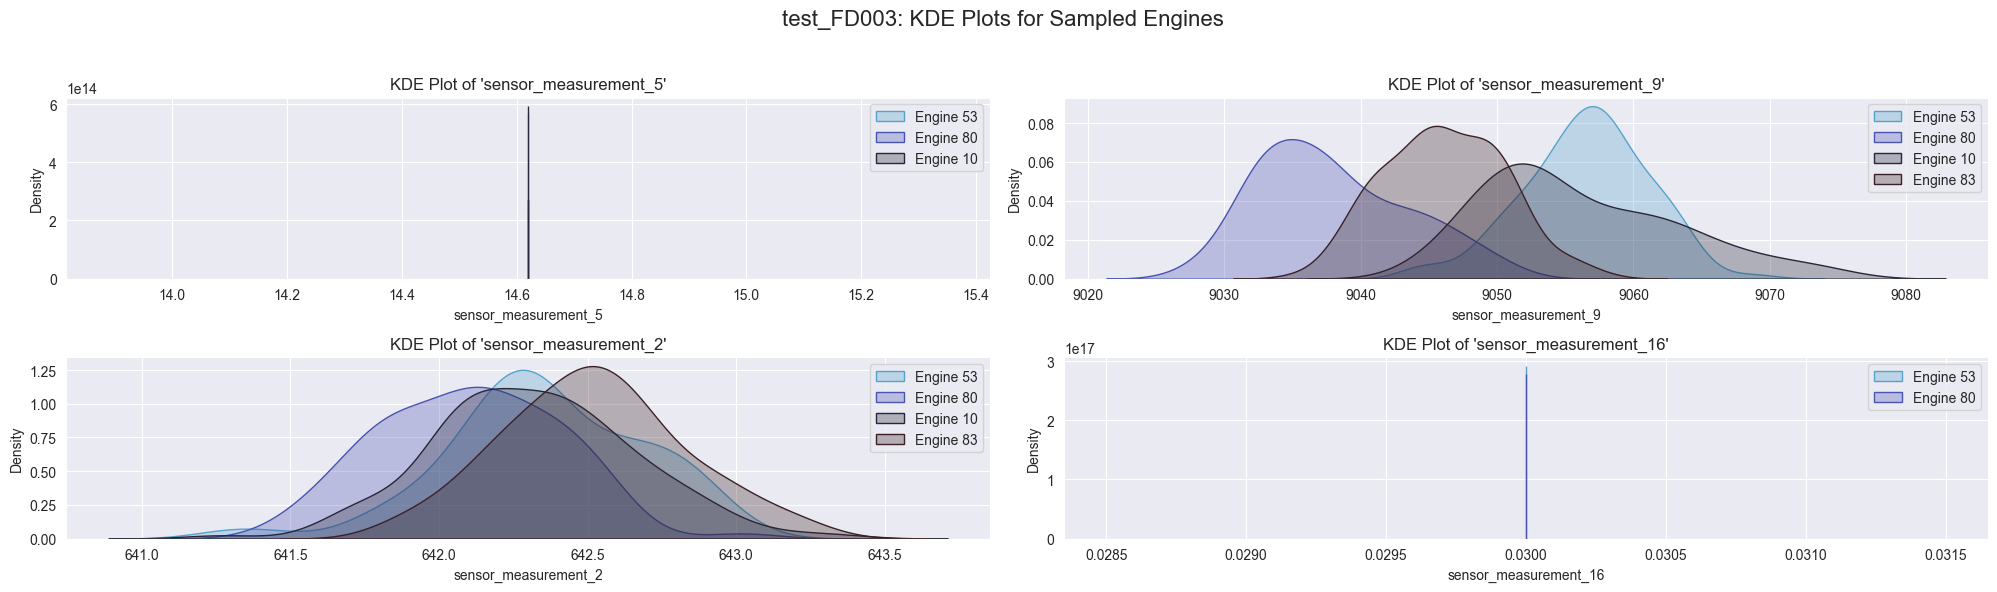

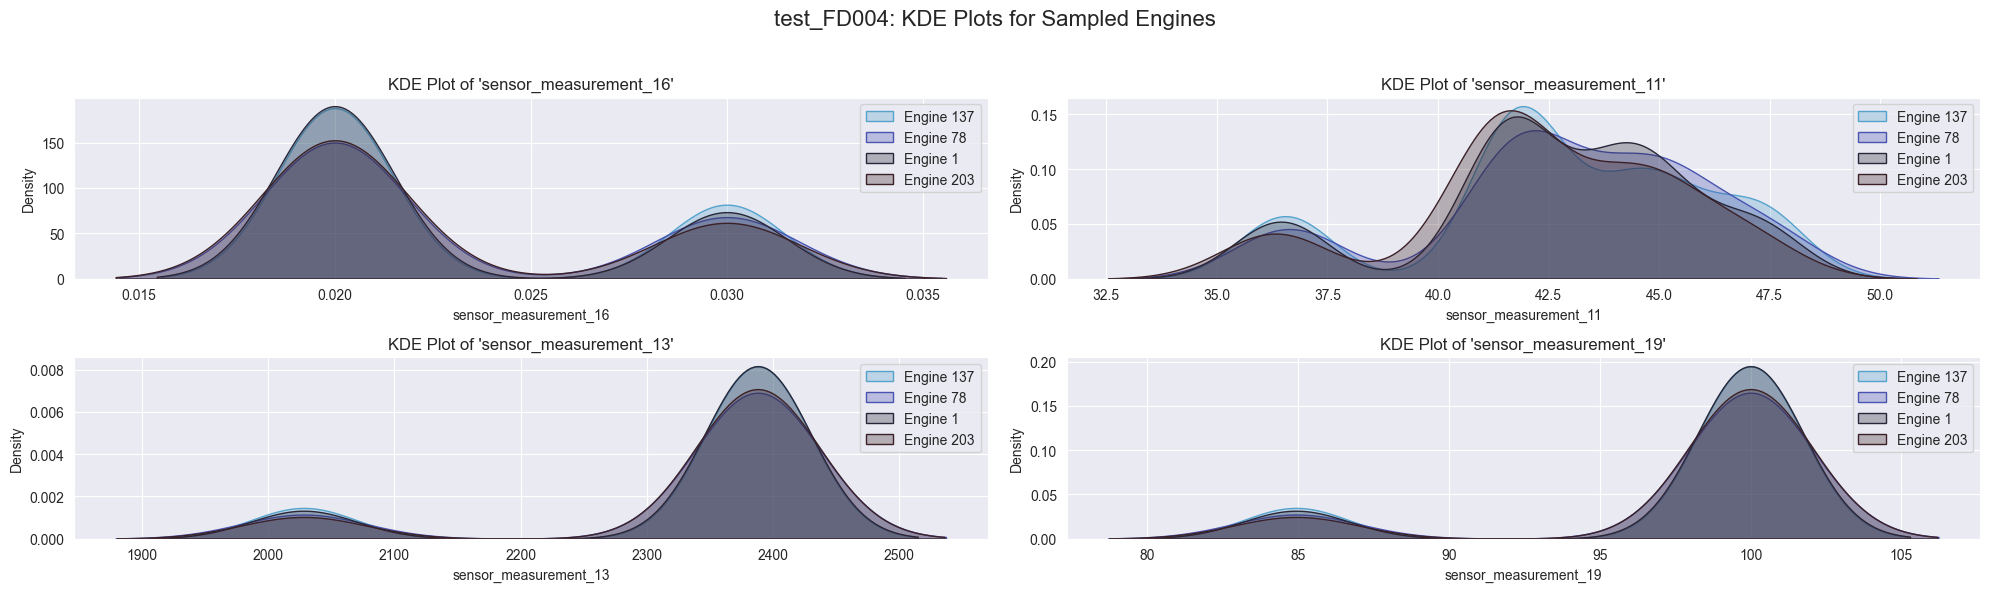

In [17]:
for name , df  in test_dfs.items():
    # Sampling Engines
    engine_list = df['engine_id'].unique()
    sample_engines = rd.sample(list(engine_list), 4)

    
    # Sampling Cycles
    sensor_cols = df.iloc[:, 5:]
    numeric_sensors = sensor_cols.select_dtypes(include='number')

    if numeric_sensors.shape[1] < 4:
        print(f"Not enough numeric columns")
        continue

    selected_sensors = rd.sample(list(numeric_sensors.columns), 4)
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
    axes = axes.flatten()

    for i, sensor in enumerate(selected_sensors):
        ax = axes[i]
        for eng in sample_engines:
            engine_data = df[df['engine_id'] == eng][sensor]

            if engine_data.var() > 0:
                sns.kdeplot(engine_data, label=f'Engine {eng}', fill=True, alpha=0.3, ax=ax, warn_singular=False)
                

        ax.set_title(f"KDE Plot of '{sensor}'")
        ax.set_xlabel(sensor)
        ax.set_ylabel("Density")
        ax.legend()

    # Step 6: Layout and show
    plt.suptitle(f"{name}: KDE Plots for Sampled Engines", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

The distributions reveal slight overlaps between some engines, while others exhibit noticeable shifts in their distribution patterns. Additionally, the presence of different peak positions suggests variations in engine performance or operating conditions, highlighting potential differences in how each engine functions over its lifecycle.

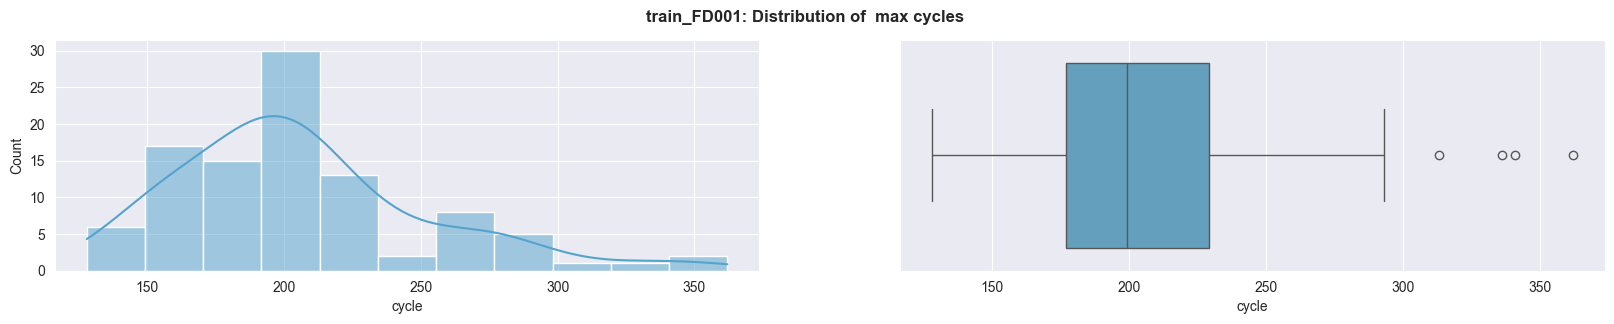

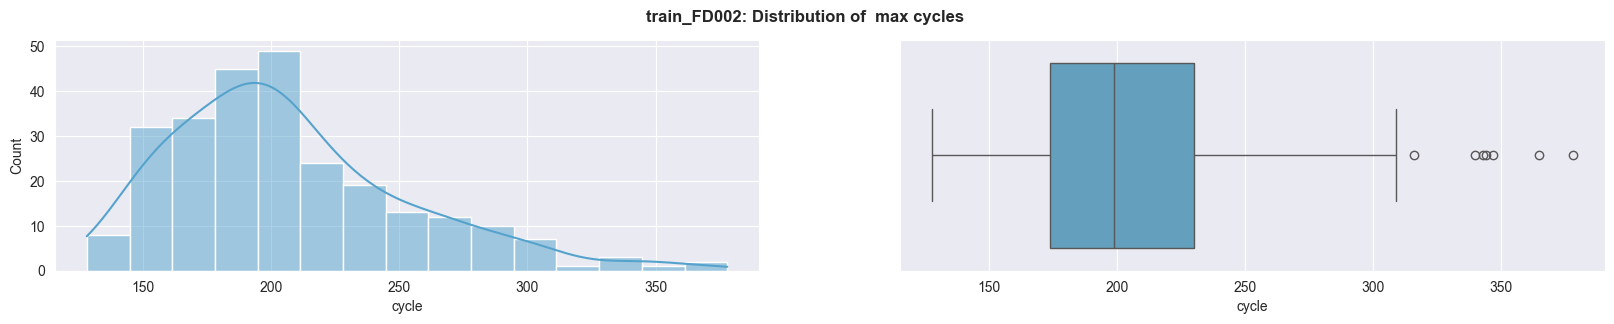

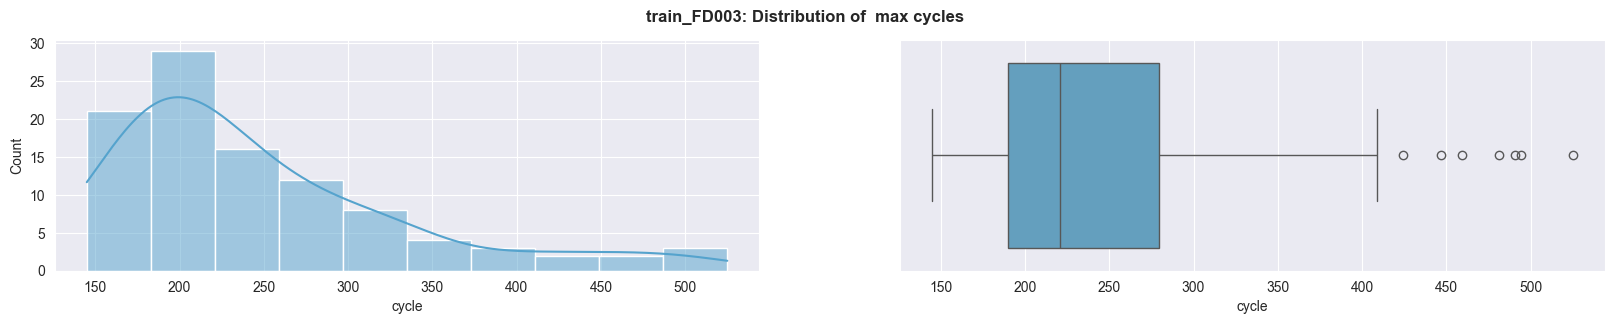

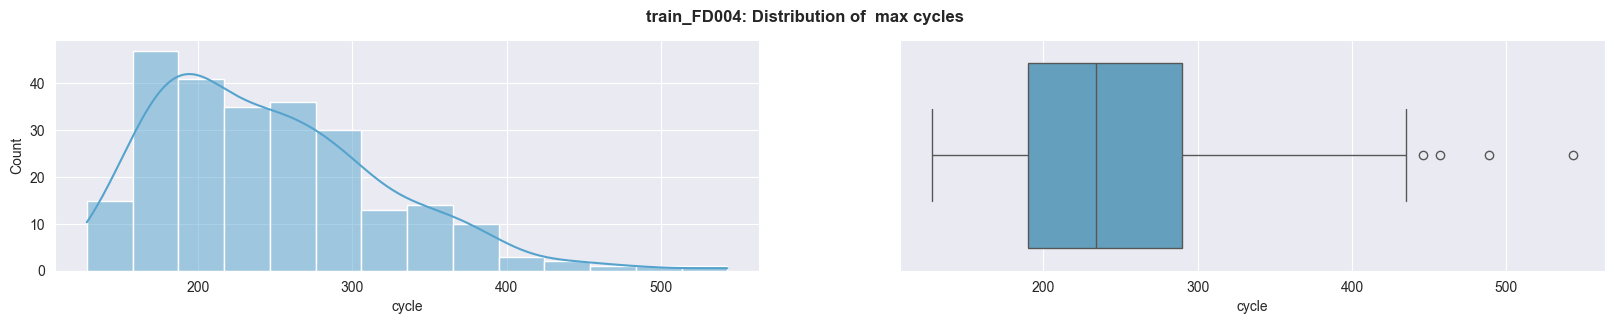

In [14]:
 # Plotting Maximum cycles
for name , df in train_dfs.items():

    max_cycles = df.groupby('engine_id')['cycle'].max().to_frame()
    fig , ax = plt.subplots( 1 , 2 , figsize = ( 20 , 3 ) )
    sns.histplot( x = 'cycle' ,  data = max_cycles , kde=True , ax = ax[0])
    sns.boxplot( x = 'cycle' , data = max_cycles , ax = ax[1])

    plt.suptitle(f"{name}: Distribution of  max cycles" , fontweight = 'bold')

    plt.show()
    

The plots show that the distributions of maximum cycles are right-skewed, indicating that most engines operate for shorter periods while a few have significantly longer lifespans. The boxplots further confirm the presence of outliers among these longer-lived engines.

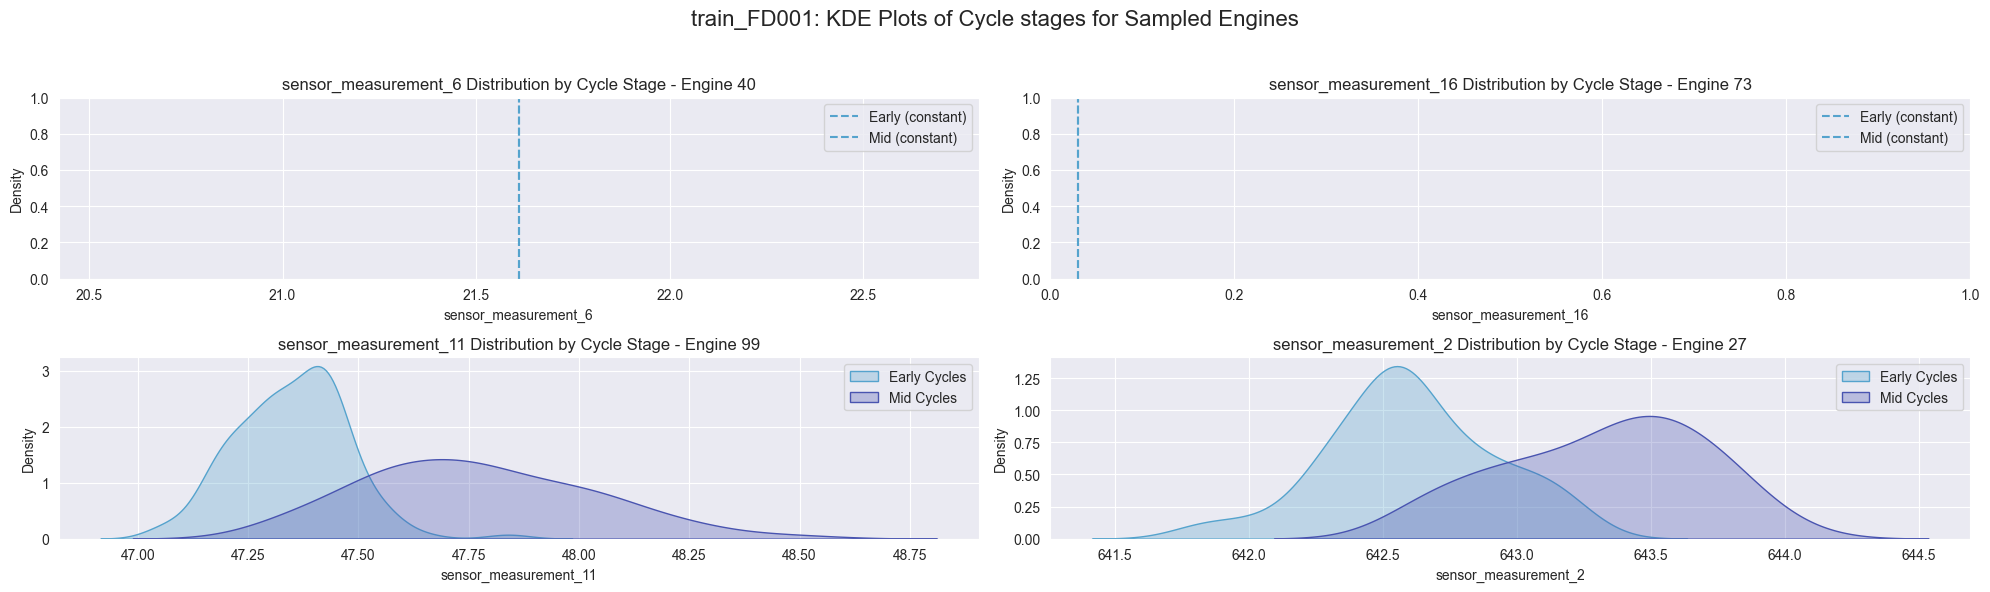

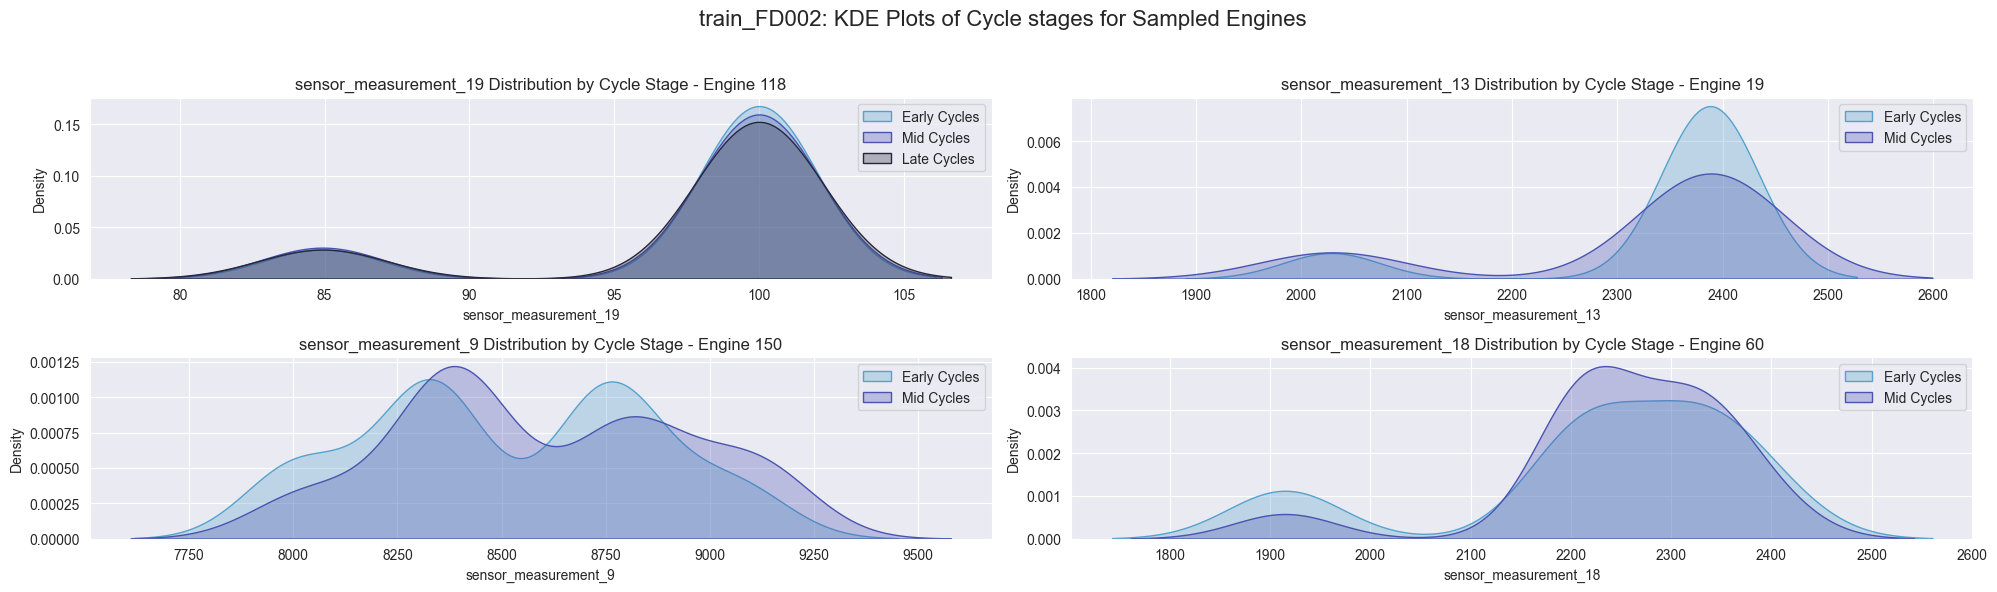

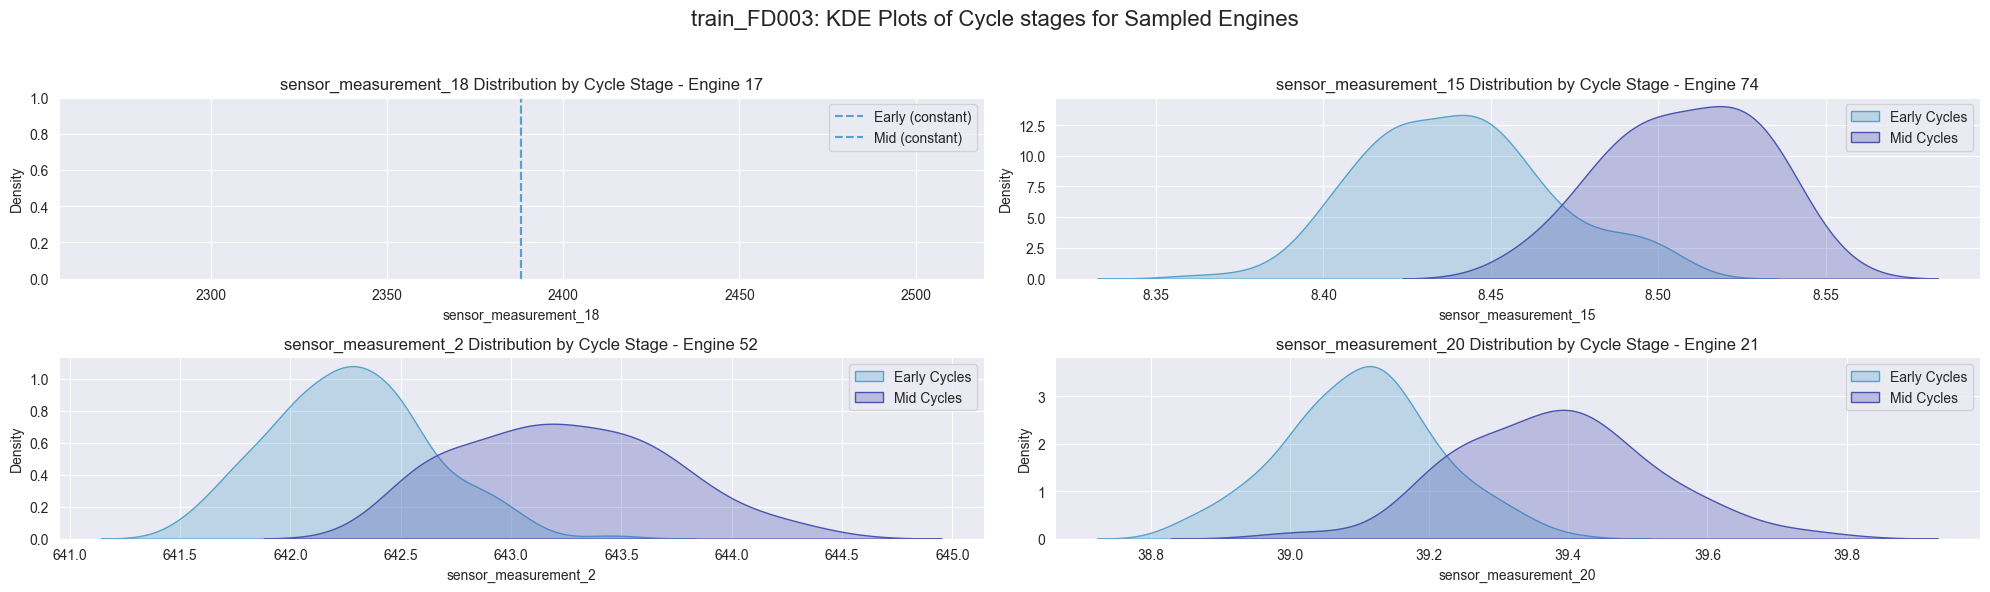

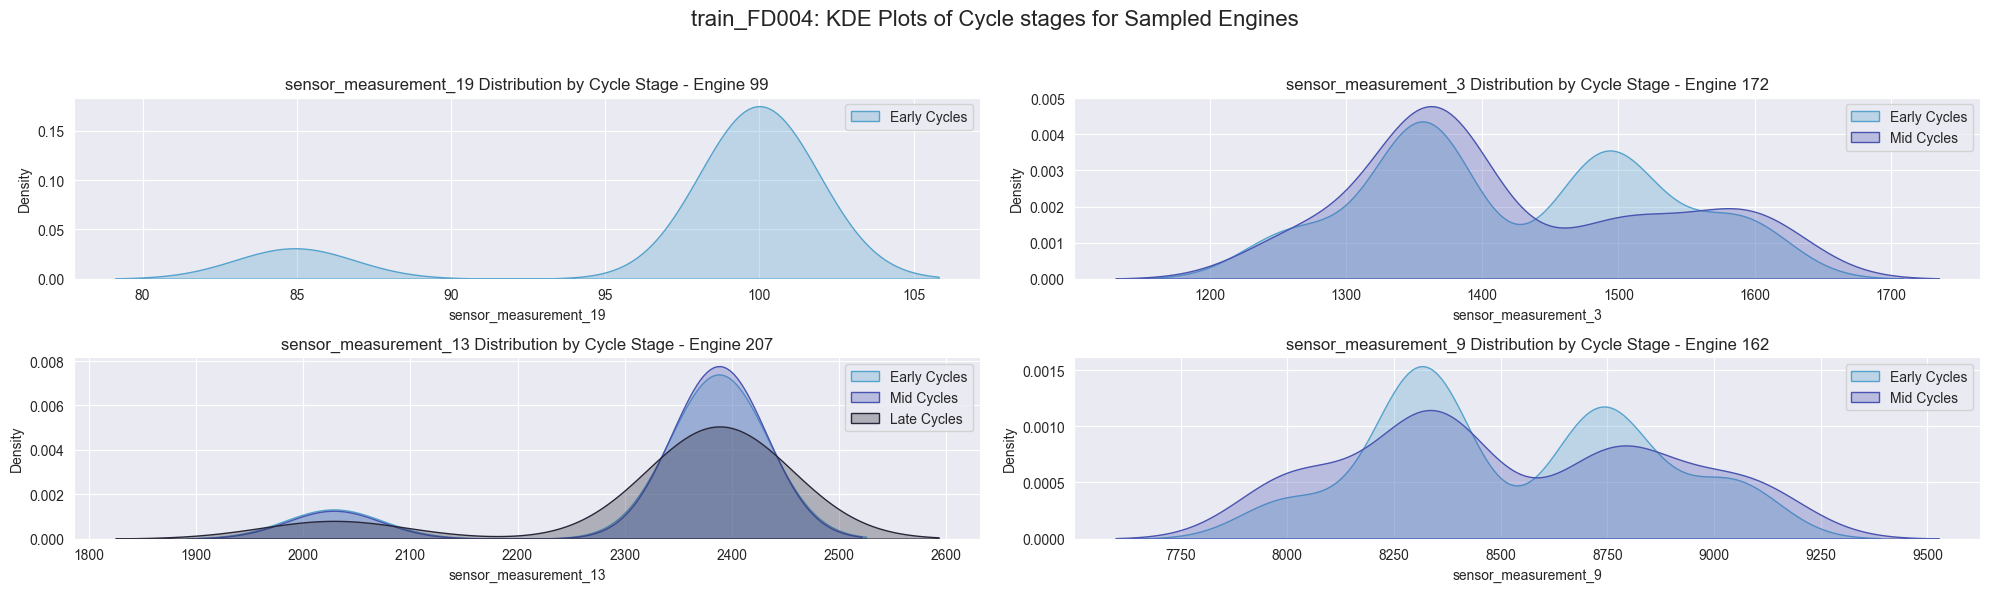

In [15]:
for name, df in train_dfs.items():
    # Sampling Engines
    engine_list = df['engine_id'].unique()
    sample_engines = rd.sample(list(engine_list), 4)

    # Get numeric sensor columns from col 5 onward
    sensor_cols = df.iloc[:, 5:].select_dtypes(include='number').columns

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
    axes = axes.flatten()

    for ax, engine in zip(axes, sample_engines):
        engine_df = df[df['engine_id'] == engine]
        max_cycle = df['cycle'].max()

        # Pick a random sensor column
        sensor_col = rd.choice(sensor_cols)

        # Define cycle bins: early (0–33%), mid (34–66%), late (67–100%)
        bins = [1, int(max_cycle * 0.33), int(max_cycle * 0.66), max_cycle]
        labels = ['Early', 'Mid', 'Late']

        plotted = False
        for i in range(3):
            stage_df = engine_df[
                (engine_df['cycle'] >= bins[i]) & 
                (engine_df['cycle'] <= bins[i + 1])
            ]
            setting_data = stage_df[sensor_col]

            if setting_data.nunique() > 1:
                sns.kdeplot(setting_data, label=f'{labels[i]} Cycles', fill=True, alpha=0.3, ax=ax, warn_singular=False)
                plotted = True
            elif setting_data.nunique() == 1:
                constant_value = setting_data.iloc[0]
                ax.axvline(x=constant_value, linestyle='--', label=f'{labels[i]} (constant)')
                plotted = True

        ax.set_title(f"{sensor_col} Distribution by Cycle Stage - Engine {engine}")
        ax.set_xlabel(sensor_col)
        ax.set_ylabel("Density")
        if plotted:
            ax.legend()

    plt.suptitle(f"{name}: KDE Plots of Cycle stages for Sampled Engines", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


The KDE plots reveal that the density curves of engines flatten progressively from the early stages to the later stages of operation. This pattern suggests gradual engine degradation over time, with performance becoming more dispersed as wear and tear accumulate.